# IF3070 Foundations of Artificial Intelligence | Tugas Kecil 2

Group Number: 28

Group Members:
- Erwan Poltak Halomoan (18222028)
- Athhar Mahendra Umar (18222080)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import chi2_contingency, mannwhitneyu
import scipy.stats as ss

# Import other libraries if needed

## Import Dataset

In [ ]:
# id = 1njL7SWE9Qgon9EszmJ4Zl8ArIEqMnlCt
df = pd.read_csv('https://drive.google.com/uc?id=1njL7SWE9Qgon9EszmJ4Zl8ArIEqMnlCt')
df.head()


id     FILENAME                                   URL  URLLength  \
0   1          NaN             https://www.northcm.ac.th       24.0   
1   4  8135291.txt                   http://uqr.to/1il1z        NaN   
2   5   586561.txt  https://www.woolworthsrewards.com.au       35.0   
3   6          NaN                                   NaN       31.0   
4  11   412632.txt                                   NaN        NaN   

                         Domain  DomainLength  IsDomainIP  TLD  \
0             www.northcm.ac.th          17.0         0.0  NaN   
1                           NaN           NaN         NaN   to   
2  www.woolworthsrewards.com.au          28.0         0.0   au   
3                           NaN           NaN         NaN  com   
4        www.nyprowrestling.com          22.0         0.0  NaN   

   CharContinuationRate  TLDLegitimateProb  ...  Pay  Crypto  \
0              0.800000                NaN  ...  0.0     0.0   
1              1.000000           0.000896  ...  NaN     0.0   
2              0.857143                NaN  ...  1.0     0.0   
3              0.562500           0.522907  ...  1.0     0.0   
4              1.000000                NaN  ...  0.0     0.0   

   HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  NoOfEmptyRef  \
0               1.0        NaN      3.0     NaN         69.0           NaN   
1               0.0        NaN      NaN     NaN          NaN           NaN   
2               1.0       33.0      7.0     8.0         15.0           NaN   
3               1.0       24.0      5.0    14.0          NaN           NaN   
4               1.0        NaN      NaN    14.0          NaN           0.0   

   NoOfExternalRef  label  
0              NaN      1  
1              1.0      0  
2              2.0      1  
3              NaN      1  
4              NaN      1  

[5 rows x 56 columns]

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## A. Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
5. Explain the significance of gathering the first four pieces of information.

#### 1. The size of the data (instances and features).

In [ ]:
# 1. Size of the data
num_instances, num_features = df.shape

print("1. Size of the data (instances, features):\n")
print(f"Instance: {num_instances}")
print(f"Features: {num_features}")


1. Size of the data (instances, features):

Instance: 140404
Features: 56


#### 2. The data types of each feature.

In [ ]:
# 2. Data types
print("2. Data types of each feature (include 'label' or target):")
df.dtypes


2. Data types of each feature (include 'label' or target):


id                              int64
FILENAME                       object
URL                            object
URLLength                     float64
Domain                         object
DomainLength                  float64
IsDomainIP                    float64
TLD                            object
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                     float64
NoOfSubDomain                 float64
HasObfuscation                float64
NoOfObfuscatedChar            float64
ObfuscationRatio              float64
NoOfLettersInURL              float64
LetterRatioInURL              float64
NoOfDegitsInURL               float64
DegitRatioInURL               float64
NoOfEqualsInURL               float64
NoOfQMarkInURL                float64
NoOfAmpersandInURL            float64
NoOfOtherSpecialCharsInURL    float64
SpacialCharRatioInURL         float64
IsHTTPS                       float64
LineOfCode                    float64
LargestLineLength             float64
HasTitle                      float64
Title                          object
DomainTitleMatchScore         float64
URLTitleMatchScore            float64
HasFavicon                    float64
Robots                        float64
IsResponsive                  float64
NoOfURLRedirect               float64
NoOfSelfRedirect              float64
HasDescription                float64
NoOfPopup                     float64
NoOfiFrame                    float64
HasExternalFormSubmit         float64
HasSocialNet                  float64
HasSubmitButton               float64
HasHiddenFields               float64
HasPasswordField              float64
Bank                          float64
Pay                           float64
Crypto                        float64
HasCopyrightInfo              float64
NoOfImage                     float64
NoOfCSS                       float64
NoOfJS                        float64
NoOfSelfRef                   float64
NoOfEmptyRef                  float64
NoOfExternalRef               float64
label                           int64
dtype: object

#### 3. The number of unique values for categorical features.


Based on independent observation of the content of each feature or column, 19 features were found to be of type `float64`, but they only contain `1.0` and `0.0` values that represent a `boolean`. Therefore, it is assumed that these 19 features should be categorized as `categorical features`, and label should be placed in a separate variable, namely `target`.

In [ ]:
# 3. Unique values
features = [
    "IsDomainIP", "HasObfuscation", "IsHTTPS", "HasTitle", "HasFavicon", "Robots",
    "IsResponsive", "NoOfURLRedirect", "NoOfSelfRedirect", "HasDescription",
    "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton", "HasHiddenFields",
    "HasPasswordField", "Bank", "Pay", "Crypto", "HasCopyrightInfo"
]

target = "label"

categorical_features = df.select_dtypes(include=['object']).columns.tolist() + features
categorical_features = list(set(categorical_features))

print("3. Number of unique values for categorical features:")

for col in categorical_features:
    print(f"Column '{col}': {df[col].nunique()} unique values")


3. Number of unique values for categorical features:
Column 'HasPasswordField': 2 unique values
Column 'HasFavicon': 2 unique values
Column 'HasObfuscation': 2 unique values
Column 'IsResponsive': 2 unique values
Column 'HasTitle': 2 unique values
Column 'Crypto': 2 unique values
Column 'TLD': 497 unique values
Column 'HasDescription': 2 unique values
Column 'NoOfURLRedirect': 2 unique values
Column 'Pay': 2 unique values
Column 'IsHTTPS': 2 unique values
Column 'HasSubmitButton': 2 unique values
Column 'FILENAME': 82872 unique values
Column 'Title': 79460 unique values
Column 'HasSocialNet': 2 unique values
Column 'URL': 96914 unique values
Column 'IsDomainIP': 2 unique values
Column 'HasCopyrightInfo': 2 unique values
Column 'Domain': 69832 unique values
Column 'NoOfSelfRedirect': 2 unique values
Column 'Robots': 2 unique values
Column 'HasHiddenFields': 2 unique values
Column 'Bank': 2 unique values
Column 'HasExternalFormSubmit': 2 unique values


It can be observed that, aside from those of type `object`, there are 19 features that only have 2 unique values (0 and 1), so these features are valid and should be included in `categorical features`.

#### 4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.

In [ ]:
# 4. Non-Categorical (Continuous) Values Statistics
non_categorical_features = [col for col in df.columns if col not in categorical_features and col != target]

non_categorical_stats = pd.DataFrame()
non_categorical_stats['Minimum'] = df[non_categorical_features].min()
non_categorical_stats['Maximum'] = df[non_categorical_features].max()
non_categorical_stats['Mean'] = df[non_categorical_features].mean()
non_categorical_stats['Median'] = df[non_categorical_features].median()
non_categorical_stats['Standard Deviation'] = df[non_categorical_features].std()



print("4. Statistics for non-categorical (continuous) features:\n")
non_categorical_stats

# Uncomment line dibawah untuk menampilkan statistik lebih lengkap, ada count dan quantile (median = 50%).
# non_categorical_features.describe()

4. Statistics for non-categorical (continuous) features:



Minimum       Maximum           Mean  \
id                           1.000000  2.357950e+05  117682.632746   
URLLength                   14.000000  4.054000e+03      27.701473   
DomainLength                 4.000000  9.300000e+01      19.619387   
CharContinuationRate         0.000000  1.000000e+00       0.918007   
TLDLegitimateProb            0.000000  5.229071e-01       0.277482   
URLCharProb                  0.001229  8.876583e-02       0.059286   
TLDLength                    2.000000  1.300000e+01       2.729015   
NoOfSubDomain                0.000000  7.000000e+00       1.161442   
NoOfObfuscatedChar           0.000000  2.910000e+02       0.005951   
ObfuscationRatio             0.000000  2.120000e-01       0.000028   
NoOfLettersInURL             0.000000  2.997000e+03      14.125178   
LetterRatioInURL             0.000000  8.650000e-01       0.483299   
NoOfDegitsInURL              0.000000  4.330000e+02       0.355737   
DegitRatioInURL              0.000000  6.000000e-01       0.006609   
NoOfEqualsInURL              0.000000  3.100000e+01       0.010238   
NoOfQMarkInURL               0.000000  3.000000e+00       0.004901   
NoOfAmpersandInURL           0.000000  5.200000e+01       0.003473   
NoOfOtherSpecialCharsInURL   0.000000  4.700000e+02       1.433350   
SpacialCharRatioInURL        0.000000  2.700000e-01       0.050954   
LineOfCode                   2.000000  4.401550e+05    1796.978470   
LargestLineLength           23.000000  1.369832e+07    8283.455268   
DomainTitleMatchScore        0.000000  1.000000e+02      70.832896   
URLTitleMatchScore           0.000000  1.000000e+02      71.133832   
NoOfPopup                    0.000000  6.020000e+02       0.359749   
NoOfiFrame                   0.000000  1.602000e+03       2.508125   
NoOfImage                    0.000000  8.956000e+03      41.647489   
NoOfCSS                      0.000000  3.582000e+04      10.268623   
NoOfJS                       0.000000  2.828000e+03      16.461729   
NoOfSelfRef                  0.000000  2.659600e+04     104.875900   
NoOfEmptyRef                 0.000000  4.887000e+03       3.733846   
NoOfExternalRef              0.000000  2.751600e+04      78.104273   

                                   Median  Standard Deviation  
id                          117421.500000        68122.005080  
URLLength                       26.000000           23.140676  
DomainLength                    19.000000            5.833808  
CharContinuationRate             1.000000            0.159142  
TLDLegitimateProb                0.522907            0.248115  
URLCharProb                      0.060264            0.008063  
TLDLength                        3.000000            0.533310  
NoOfSubDomain                    1.000000            0.445054  
NoOfObfuscatedChar               0.000000            1.082855  
ObfuscationRatio                 0.000000            0.001697  
NoOfLettersInURL                13.000000           15.905539  
LetterRatioInURL                 0.483000            0.101771  
NoOfDegitsInURL                  0.000000            3.386914  
DegitRatioInURL                  0.000000            0.033156  
NoOfEqualsInURL                  0.000000            0.242953  
NoOfQMarkInURL                   0.000000            0.079828  
NoOfAmpersandInURL               0.000000            0.241136  
NoOfOtherSpecialCharsInURL       1.000000            2.021879  
SpacialCharRatioInURL            0.043000            0.022624  
LineOfCode                    1014.000000         3772.263209  
LargestLineLength             2681.000000        74904.769628  
DomainTitleMatchScore          100.000000           45.039128  
URLTitleMatchScore             100.000000           44.886539  
NoOfPopup                        0.000000            4.788340  
NoOfiFrame                       1.000000            7.815329  
NoOfImage                       23.000000          102.538702  
NoOfCSS                          5.000000          133.321659

#### 5. Explain the significance of gathering the first four pieces of information.

1. Data Size (Number of Rows and Columns)

Knowing the size of the dataset (i.e., the number of rows and columns) helps us understand its complexity and scale. This insight is essential for selecting appropriate analysis methods. For instance, large datasets may require more efficient data processing techniques, while smaller datasets may allow for more straightforward analyses.

2. Data Types

The type of each feature (e.g., numeric, categorical, boolean) influences how the data is processed. Numeric data can be analyzed directly with statistical methods, while categorical data might need encoding (e.g., one-hot encoding) before analysis. Understanding the data types ensures the correct transformation or analysis method is applied.

3. Unique Values (for Categorical Data)

For categorical features, knowing the number of unique values is important to understand the variation in the data. A feature with only a few unique values might be processed differently (e.g., using label encoding or one-hot encoding) compared to a feature with many unique values. This also helps identify potential issues like skewed or imbalanced categories.

4. Basic Statistics

Calculating basic statistics like mean, median, mode, standard deviation, and percentiles helps identify outliers and the central tendency of the data. Outliers, for example, could indicate errors or interesting patterns. Basic statistics also aid in detecting skewed distributions and informing data normalization or transformation decisions for better analysis and modeling.

### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

#### 1. Missing values for each feature.

In [ ]:
# 1. Missing values for each feature
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info


Missing Values  Percentage
id                                       0    0.000000
FILENAME                             57532   40.976041
URL                                  43487   30.972764
URLLength                            60639   43.188940
Domain                               70197   49.996439
DomainLength                         46319   32.989801
IsDomainIP                           42130   30.006268
TLD                                  45399   32.334549
CharContinuationRate                 48042   34.216974
TLDLegitimateProb                    52873   37.657759
URLCharProb                          52071   37.086550
TLDLength                            47731   33.995470
NoOfSubDomain                        44060   31.380872
HasObfuscation                       65720   46.807783
NoOfObfuscatedChar                   66798   47.575568
ObfuscationRatio                     64598   46.008661
NoOfLettersInURL                     63338   45.111250
LetterRatioInURL                     65746   46.826301
NoOfDegitsInURL                      58810   41.886271
DegitRatioInURL                      53508   38.110025
NoOfEqualsInURL                      61578   43.857725
NoOfQMarkInURL                       44101   31.410074
NoOfAmpersandInURL                   45387   32.326002
NoOfOtherSpecialCharsInURL           47629   33.922823
SpacialCharRatioInURL                62834   44.752286
IsHTTPS                              49362   35.157118
LineOfCode                           69153   49.252870
LargestLineLength                    67928   48.380388
HasTitle                             44579   31.750520
Title                                58247   41.485285
DomainTitleMatchScore                49997   35.609384
URLTitleMatchScore                   52216   37.189824
HasFavicon                           58422   41.609926
Robots                               46732   33.283952
IsResponsive                         42542   30.299707
NoOfURLRedirect                      67384   47.992935
NoOfSelfRedirect                     66715   47.516453
HasDescription                       54639   38.915558
NoOfPopup                            43353   30.877325
NoOfiFrame                           49944   35.571636
HasExternalFormSubmit                55592   39.594314
HasSocialNet                         67999   48.430956
HasSubmitButton                      61620   43.887639
HasHiddenFields                      43795   31.192131
HasPasswordField                     66535   47.388251
Bank                                 54996   39.169824
Pay                                  43174   30.749836
Crypto                               50197   35.751830
HasCopyrightInfo                     67345   47.965158
NoOfImage                            50472   35.947694
NoOfCSS                              67134   47.814877
NoOfJS                               60801   43.304322
NoOfSelfRef                          48132   34.281075
NoOfEmptyRef                         42686   30.402268
NoOfExternalRef                      69379   49.413834
label                                    0    0.000000

#### 2. Outliers for each feature (IQR Method).

Outliers are only identified in 'non-categorical features' (continuous).

In [ ]:
# 2. Outliers for each feature (IQR Method).
Q1 = df[non_categorical_features].quantile(0.25)
Q3 = df[non_categorical_features].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[non_categorical_features]< (Q1 - 1.5 * IQR)) | (df[non_categorical_features]> (Q3 + 1.5 * IQR)))

outliers_count_iqr = outliers_iqr.sum()
outliers_percentage_iqr = (outliers_count_iqr / len(df[non_categorical_features])) * 100

outliers_summary = pd.DataFrame({
    'Outliers Count': outliers_count_iqr,
    'Outliers Percentage (%)': outliers_percentage_iqr
})

print("Outliers using IQR method:")
print(outliers_summary)

for column in df[non_categorical_features]:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers in column '{column}' with respect to frequency:")
        print(outliers.value_counts())
        print("\n" + "-"*40 + "\n")


# Uncomment kode dibawah jika ingin melihat outliers dari data kategorikal yang bertipe 'float64' dan/atau 'int64',  termasuk data target yaitu 'label'.
# numerical_features = df.select_dtypes(include=['int64', 'float64'])
# Q1 = numerical_features.quantile(0.25)
# Q3 = numerical_features.quantile(0.75)
# IQR = Q3 - Q1

# outliers_iqr = ((numerical_features< (Q1 - 1.5 * IQR)) | (numerical_features> (Q3 + 1.5 * IQR)))

# outliers_count_iqr = outliers_iqr.sum()
# outliers_percentage_iqr = (outliers_count_iqr / len(numerical_features)) * 100

# outliers_summary = pd.DataFrame({
#     'Outliers Count': outliers_count_iqr,
#     'Outliers Percentage (%)': outliers_percentage_iqr
# })

# print("Outliers using IQR method:")
# print(outliers_summary)

Outliers using IQR method:
                            Outliers Count  Outliers Percentage (%)
id                                       0                 0.000000
URLLength                             2513                 1.789835
DomainLength                          1774                 1.263497
CharContinuationRate                 16778                11.949802
TLDLegitimateProb                        0                 0.000000
URLCharProb                           3561                 2.536253
TLDLength                              438                 0.311957
NoOfSubDomain                        15938                11.351528
NoOfObfuscatedChar                      23                 0.016381
ObfuscationRatio                        32                 0.022791
NoOfLettersInURL                      2788                 1.985698
LetterRatioInURL                       504                 0.358964
NoOfDegitsInURL                       4861                 3.462152
DegitRatioInURL      

#### 3.Why is it necessary to identify missing values and outliers?

1. Impact on Data Quality

Missing values and outliers both affect the quality of your dataset. Missing data can create gaps in your analysis, while outliers can distort the distribution and summary statistics, leading to misleading conclusions.

2. Influence on Statistical Measures

Missing values can result in biased estimates and inefficient statistical analyses. Outliers can heavily influence statistical measures like mean, standard deviation, and regression coefficients, leading to inaccurate interpretations.

3. Model Performance

Many machine learning algorithms, including regression and decision trees, cannot handle missing values directly, causing them to fail without preprocessing. Outliers can distort model predictions, particularly for algorithms like KNN and SVM, which rely on distance metrics.

4. Preprocessing Requirement

Identifying and handling missing values and outliers is essential for data preprocessing. Proper handling ensures that the dataset is clean, balanced, and suitable for statistical analysis and machine learning, improving model performance and generalization.

Sources:

Little, R.J., & Rubin, D.B. (2019). Statistical Analysis with Missing Data (3rd Edition). Wiley.

Barnett, V., & Lewis, T. (1994). Outliers in Statistical Data (3rd Edition). Wiley

### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

##### 1. Correlations between features.

###### 1.1 Correlations between numeric-numeric and numeric-object features.

<ipython-input-9-4accbdb0a60d>:12: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
<ipython-input-9-4accbdb0a60d>:12: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
<ipython-input-9-4accbdb0a60d>:12: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
<ipython-input-9-4accbdb0a60d>:12: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
<ipython-input-9-4accbdb0a60d>:12: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))


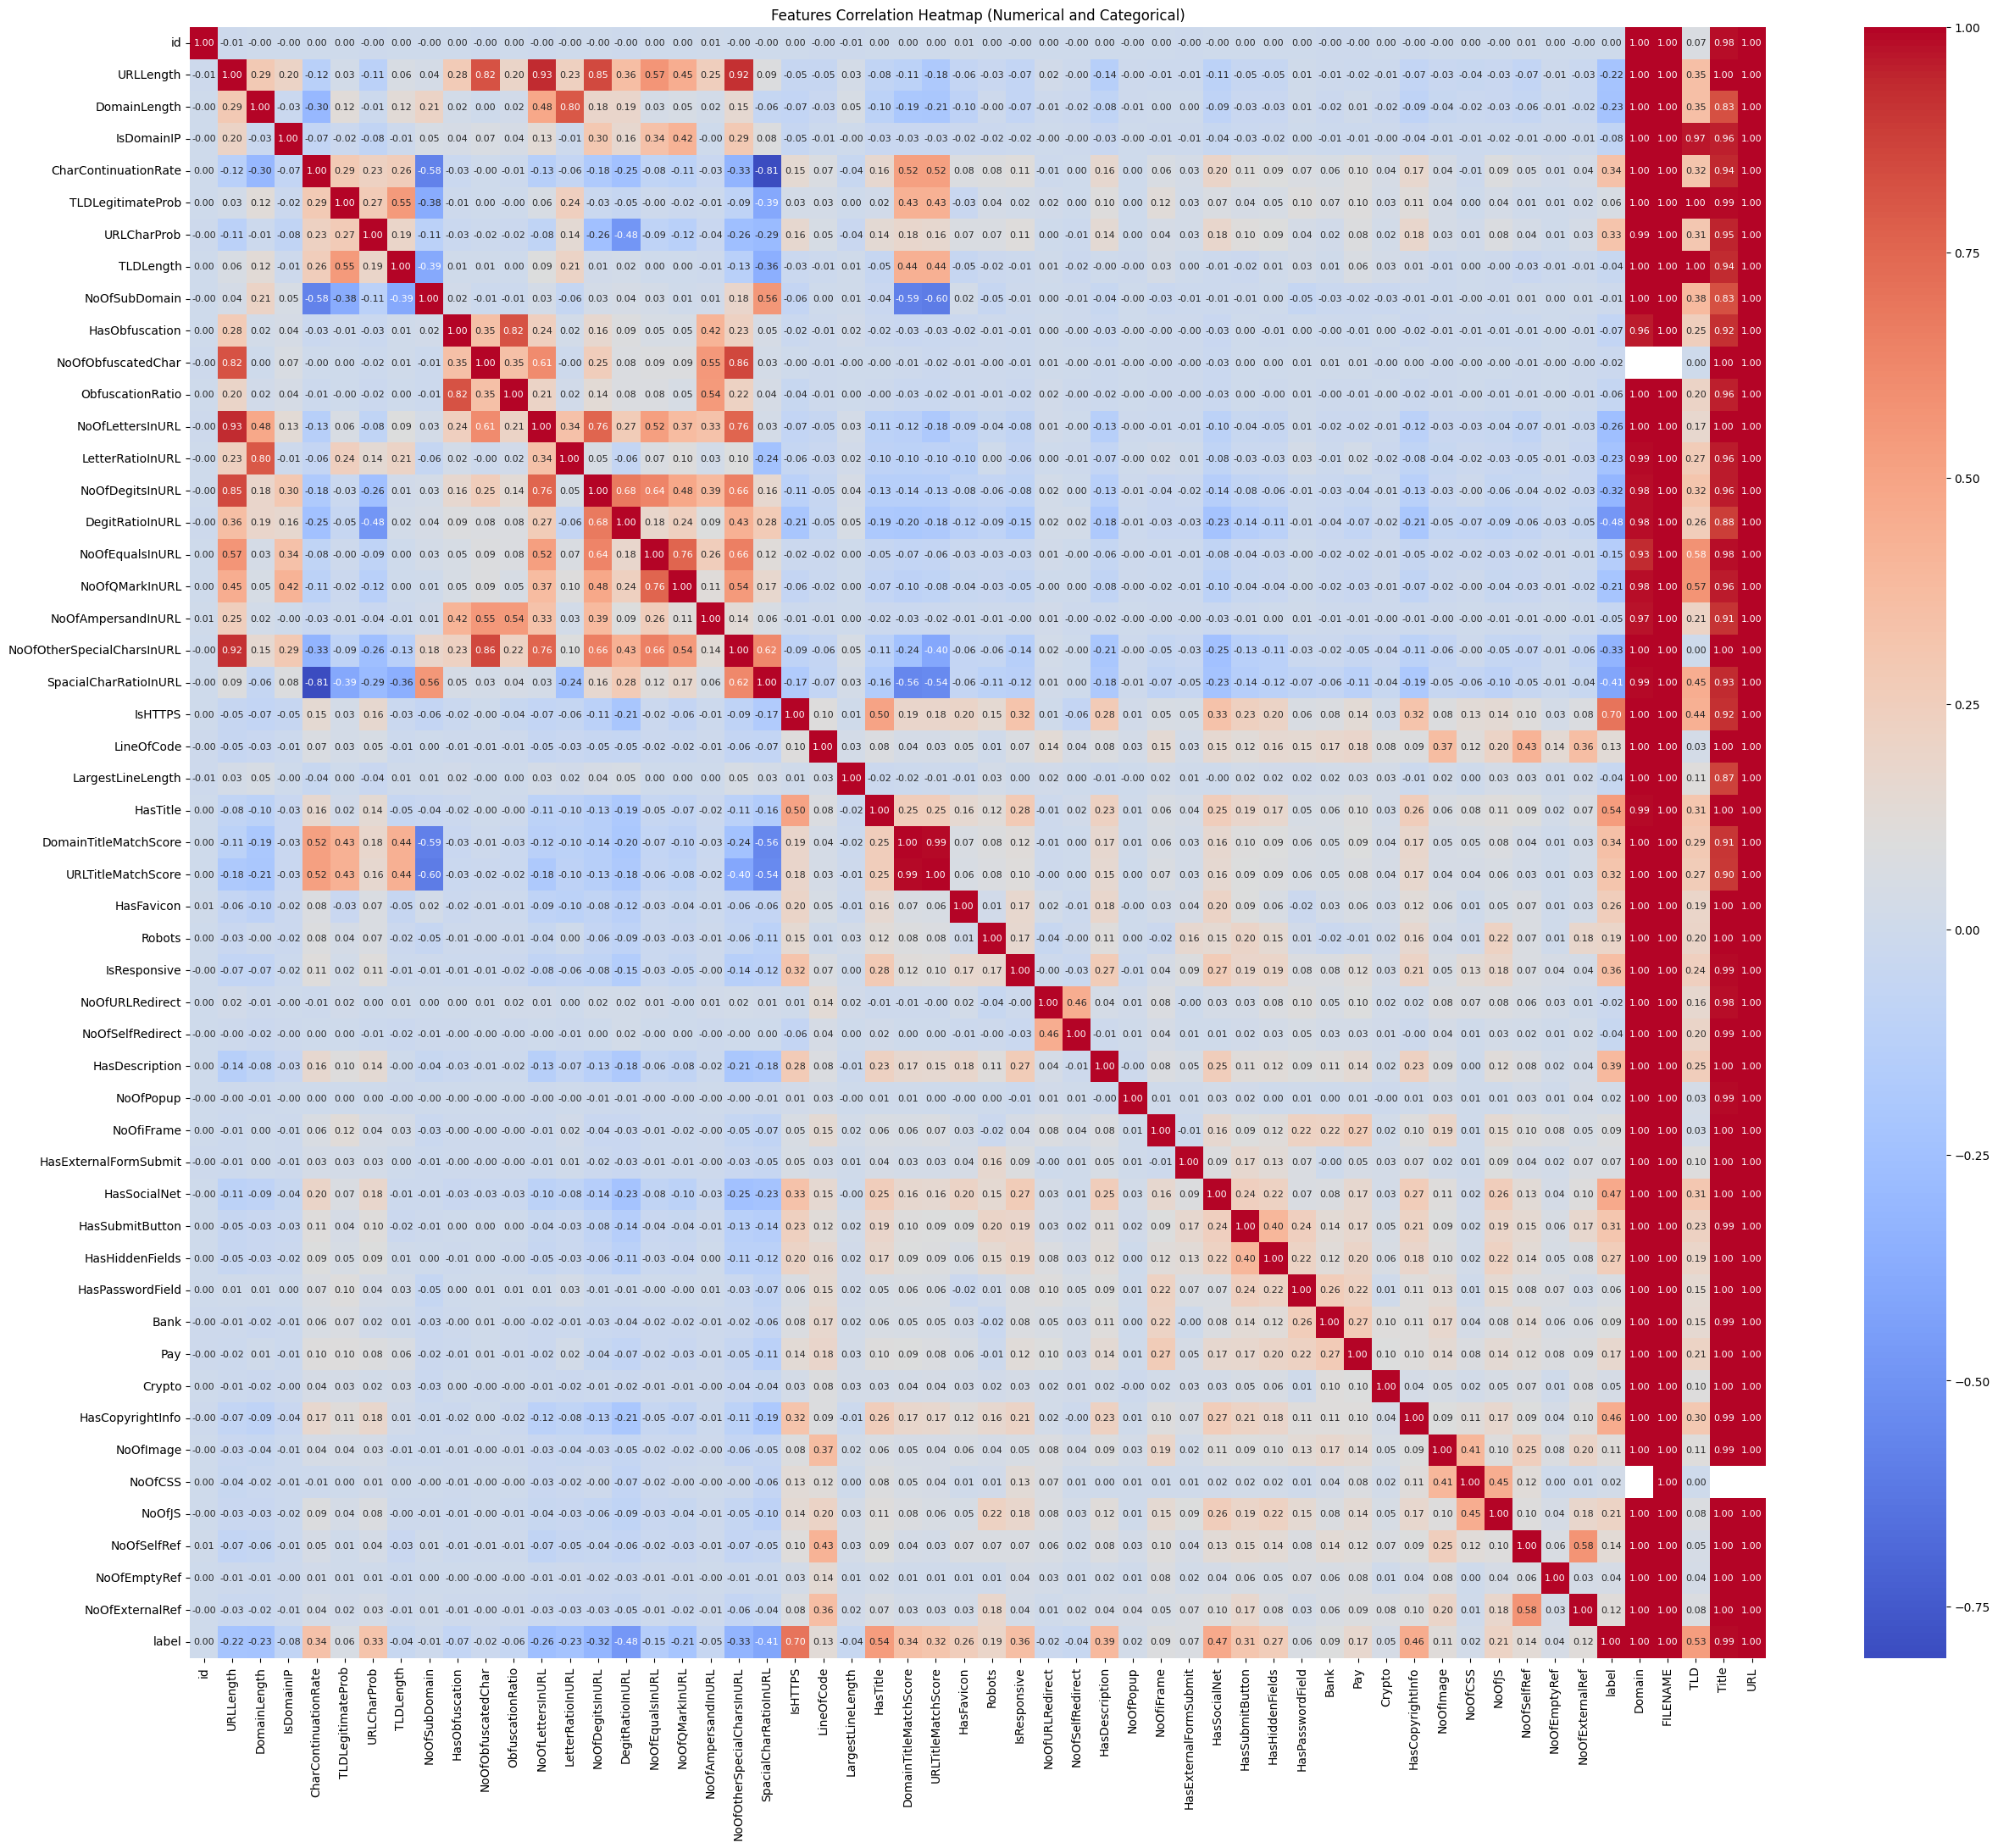

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr()

object_features = df.select_dtypes(include=['object']).columns
cramers_v_values = {}

for cat_feature in object_features:
    for num_feature in numerical_features.columns:
        contingency_table = pd.crosstab(df[cat_feature], pd.cut(df[num_feature], bins=10))
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        cramers_v_values[(cat_feature, num_feature)] = cramers_v

cramers_v_df = pd.DataFrame.from_dict(cramers_v_values, orient='index', columns=['Cramér\'s V'])
cramers_v_df.index = pd.MultiIndex.from_tuples(cramers_v_df.index, names=['Categorical Feature', 'Numerical Feature'])
cramers_v_pivot = cramers_v_df.unstack(level=0)['Cramér\'s V']

combined_correlation = pd.concat([correlation_matrix, cramers_v_pivot], axis=1).fillna(0)
for cat_feature in object_features:
    combined_correlation[cat_feature] = cramers_v_pivot[cat_feature]

# Plot
plt.figure(figsize=(30, 25))
sns.heatmap(combined_correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 8})
plt.title("Features Correlation Heatmap (Numerical and Categorical)")
plt.show()

###### 1.2 Correlations between 'object' and 'object' features.

We separate the correlation between 'object' features because it is too large and takes too long to compute. However, this has been addressed by performing sampling before calculating the correlation.

          FILENAME  URL  Domain   TLD  Title
FILENAME       1.0  1.0     1.0  1.00   1.00
URL            1.0  1.0     1.0  1.00   1.00
Domain         1.0  1.0     1.0  1.00   1.00
TLD            1.0  1.0     1.0  1.00   0.94
Title          1.0  1.0     1.0  0.94   1.00


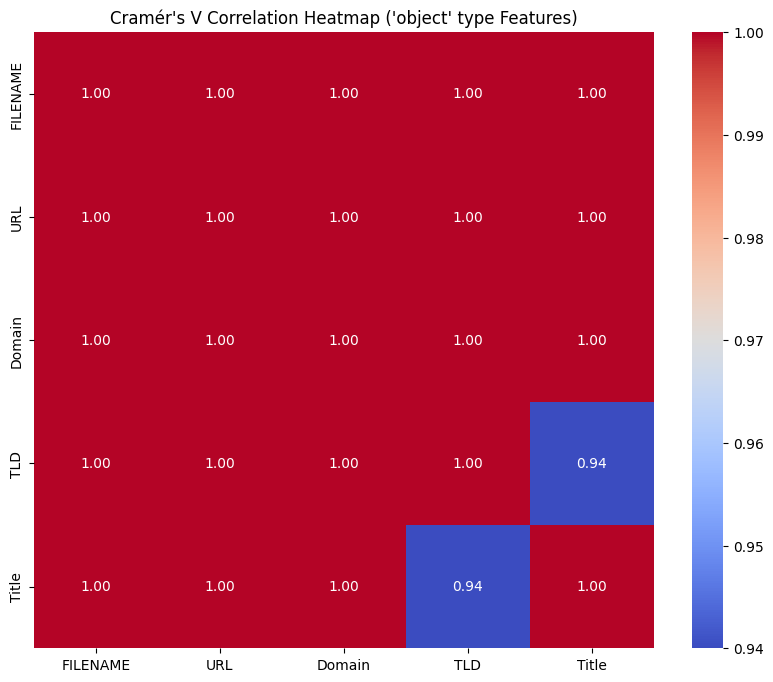

In [ ]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1
    return (stat / (obs * mini))

object_features = df.select_dtypes(include=['object']).columns
sampled_df = df.sample(frac=0.1, random_state=42)
rows = []

for var1 in object_features:
    col = []
    for var2 in object_features:
        cramers = cramers_V(sampled_df[var1], sampled_df[var2])
        col.append(round(cramers, 2))
    rows.append(col)

cramers_results = np.array(rows)
cramers_v_df = pd.DataFrame(cramers_results, columns=object_features, index=object_features)
print(cramers_v_df)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 10})
plt.title("Cramér's V Correlation Heatmap ('object' type Features)")
plt.show()

#### 2. Visualize the distribution of each feature (categorical and continuous).

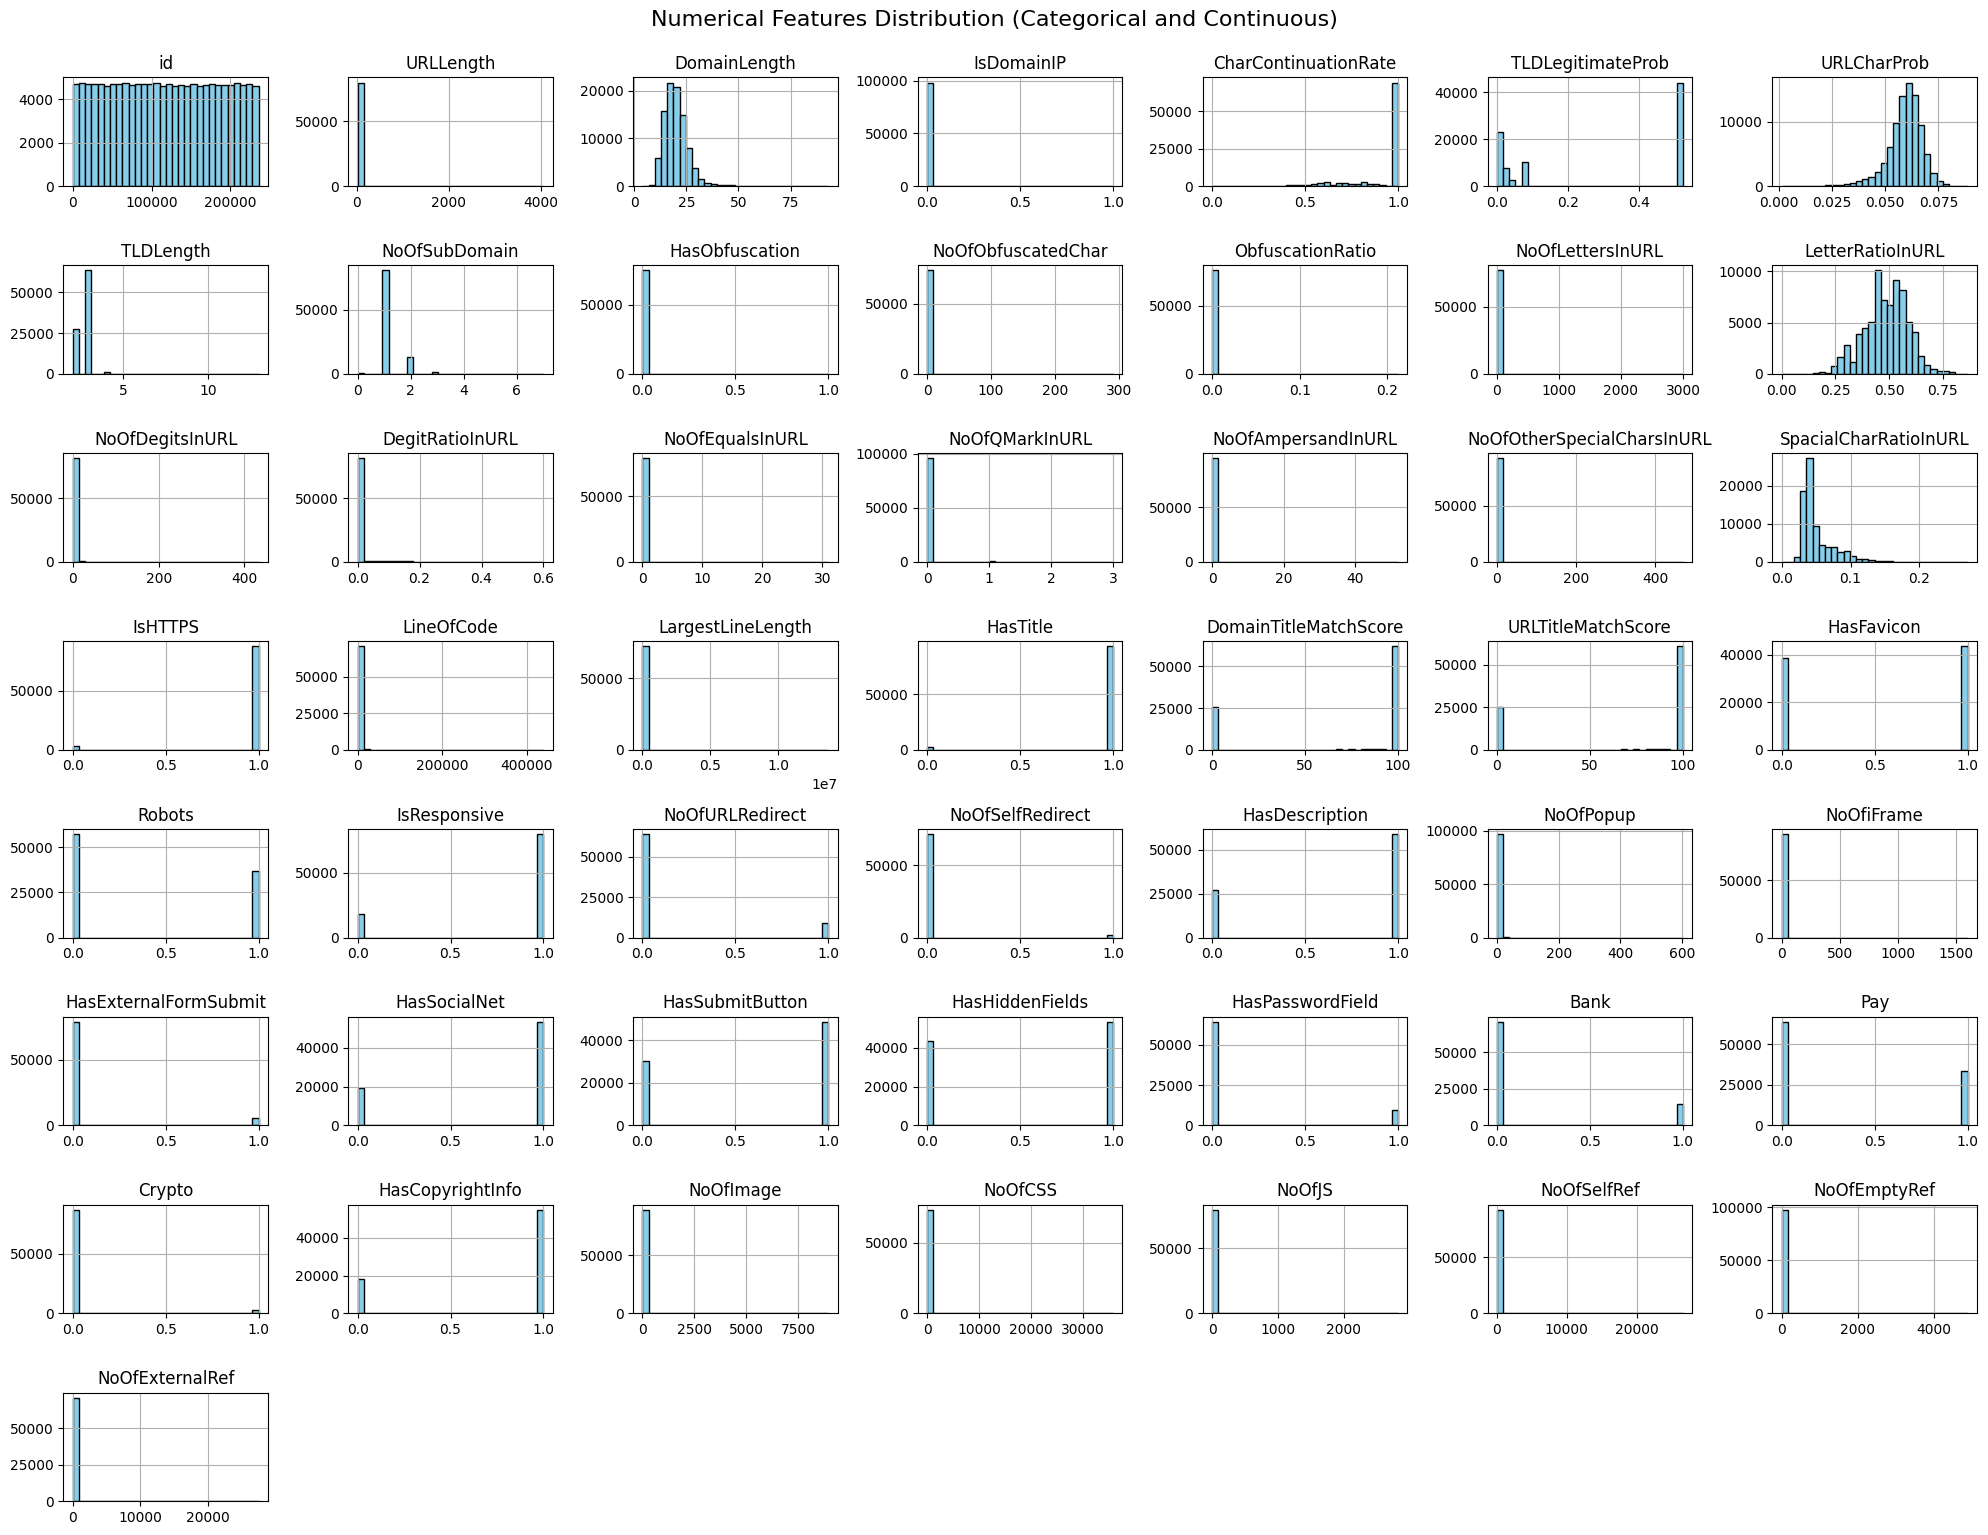

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
distributed_features = numerical_features.drop('label')

df[distributed_features].hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')

plt.tight_layout()
plt.suptitle("Numerical Features Distribution (Categorical and Continuous)", fontsize=16, y=1.02)
plt.show()

Here's the visualization per feature that is more prominent and clear with the addition of KDE (Kernel Density Estimation) without the 'label'.

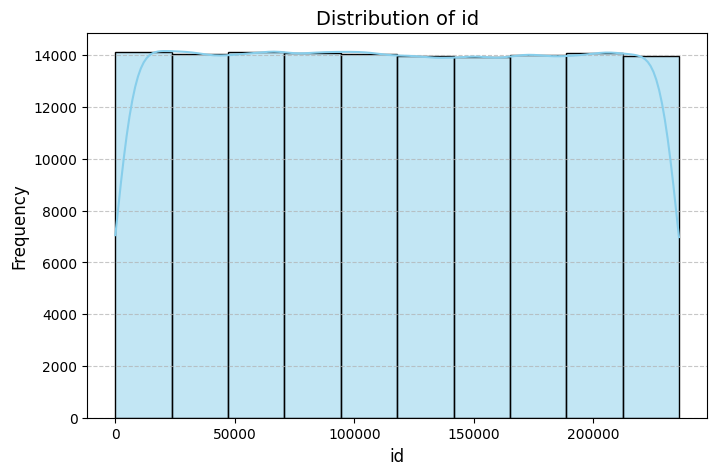

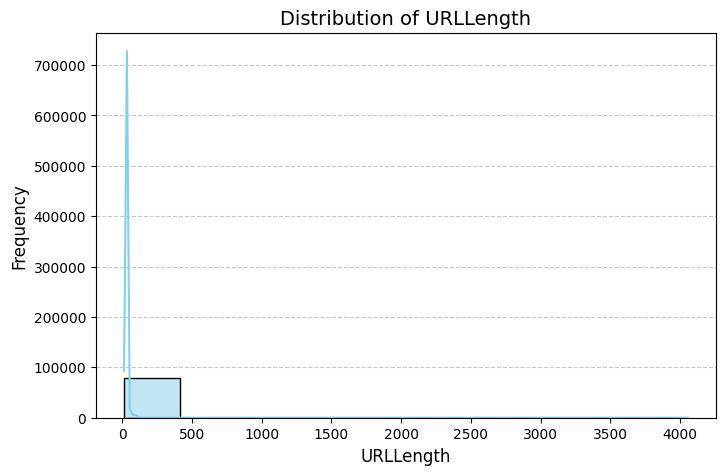

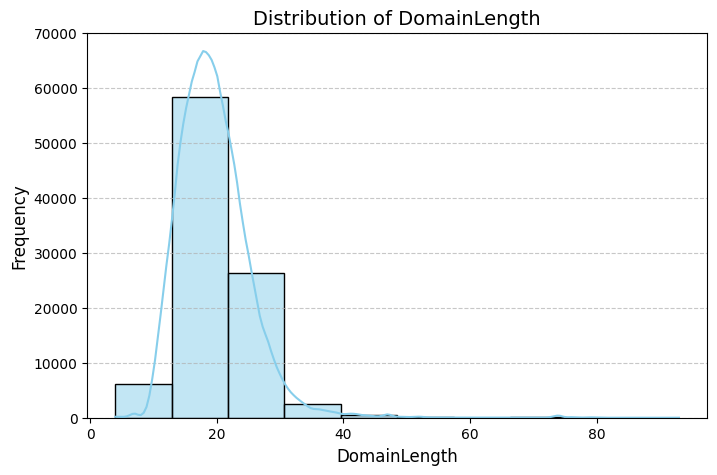

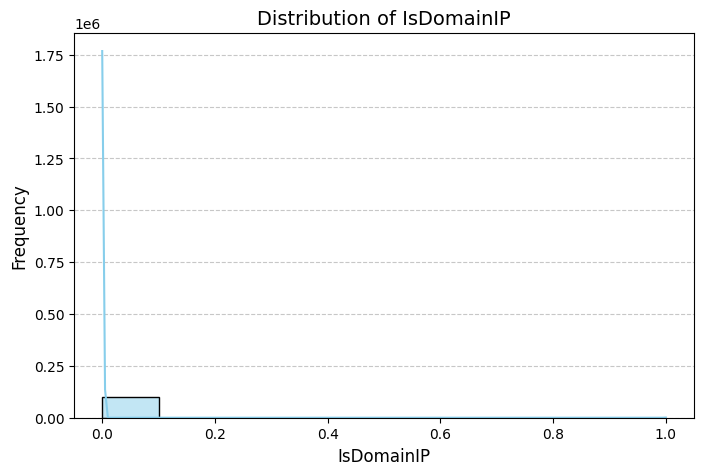

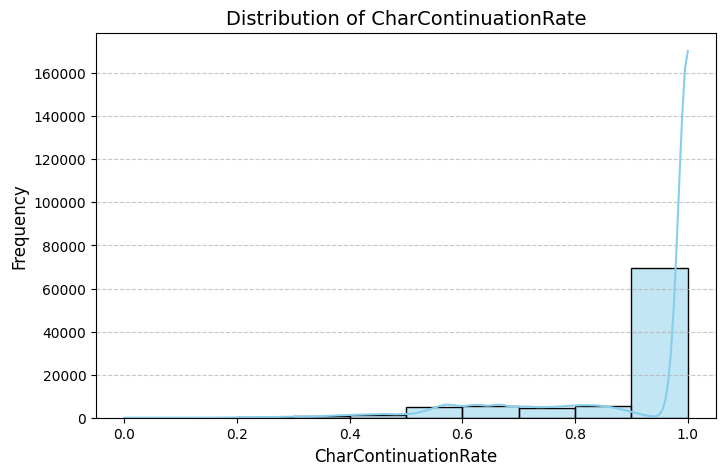

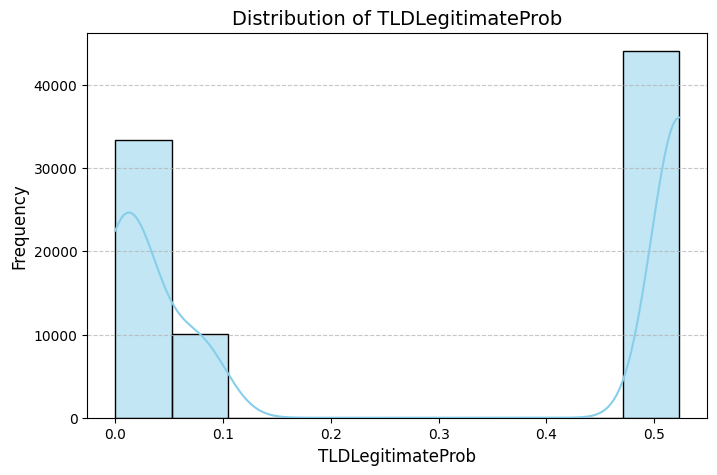

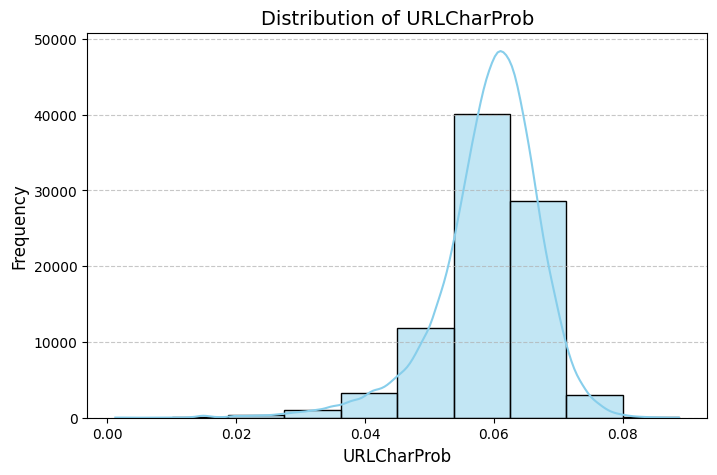

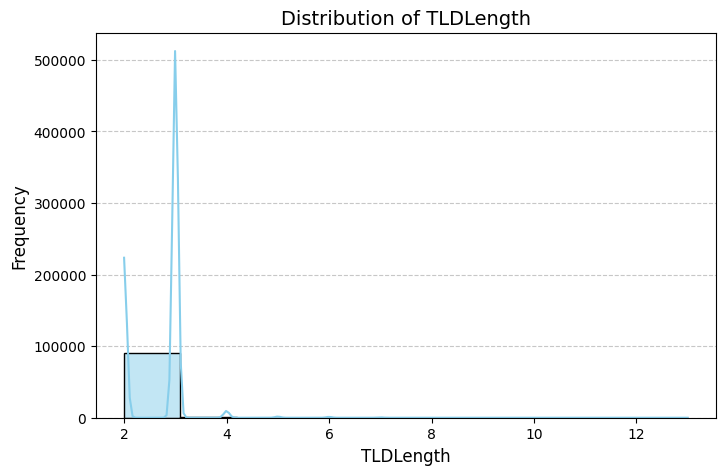

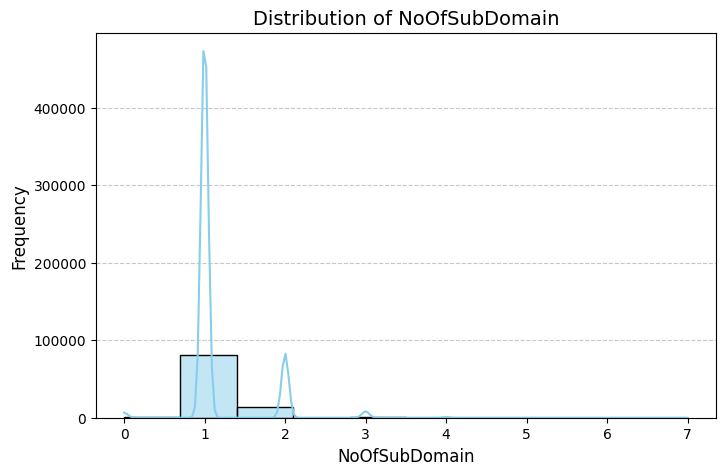

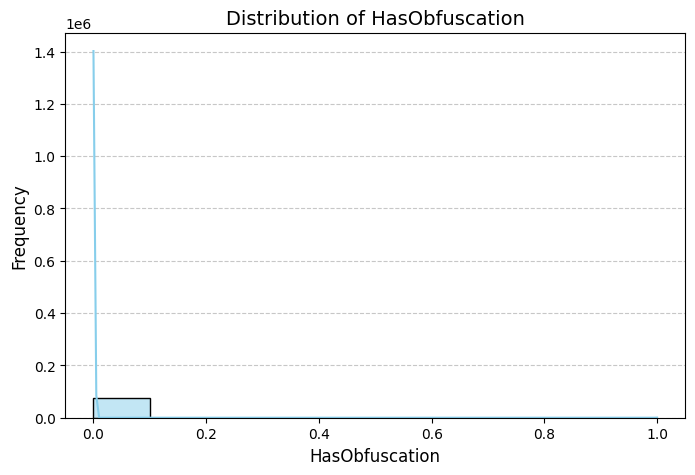

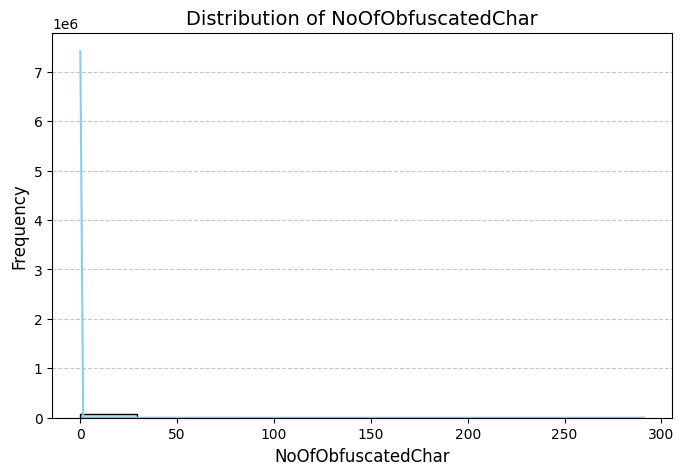

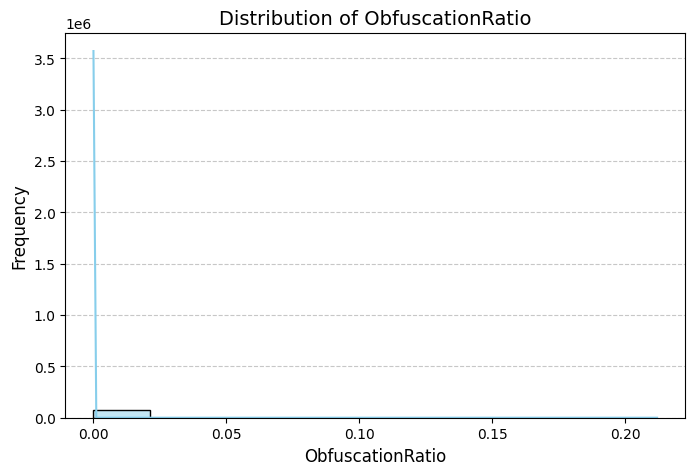

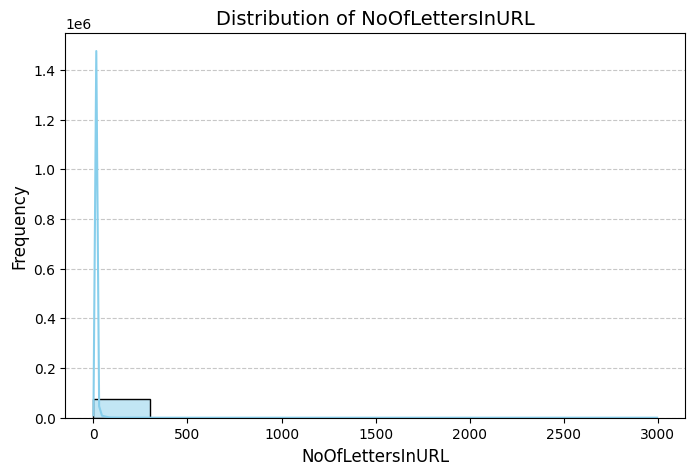

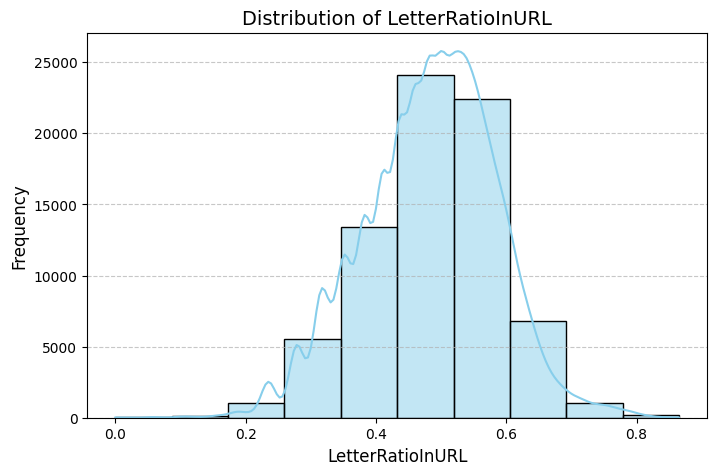

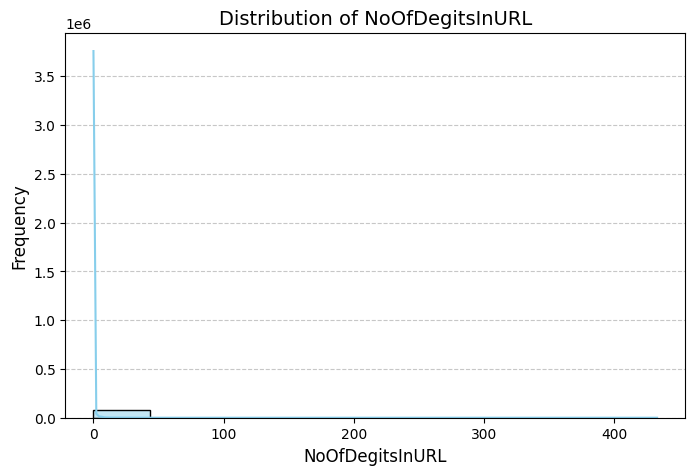

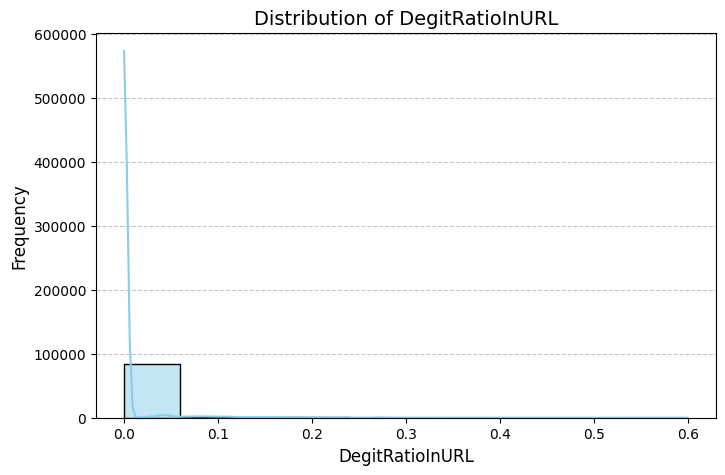

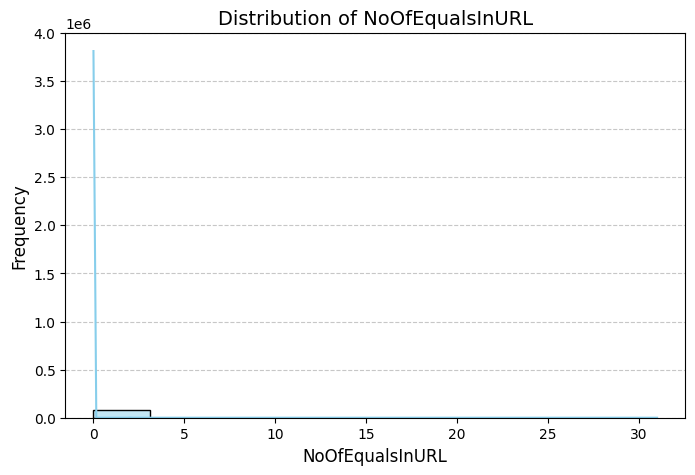

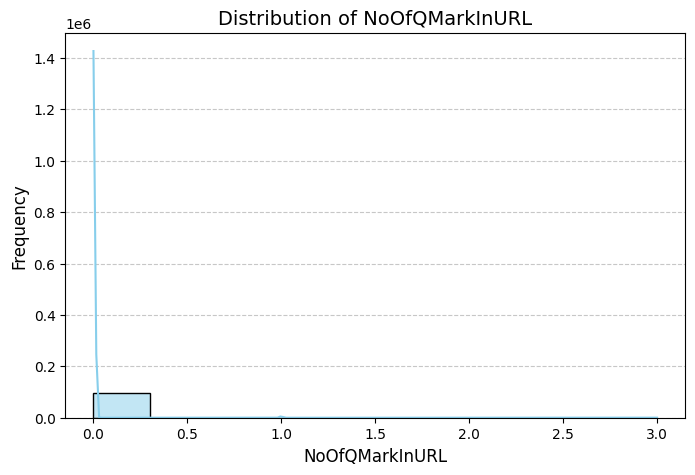

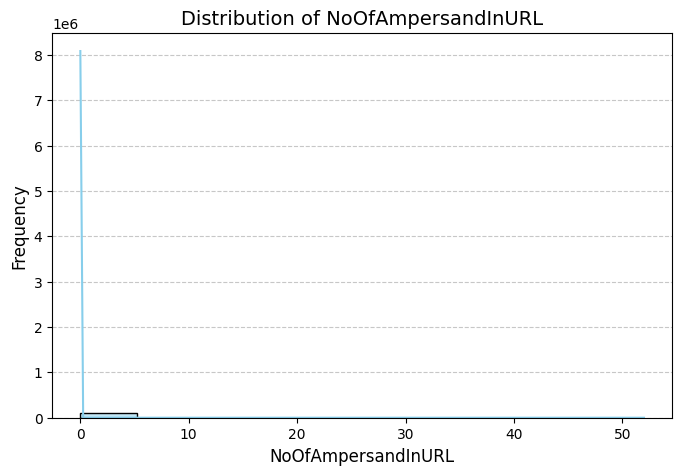

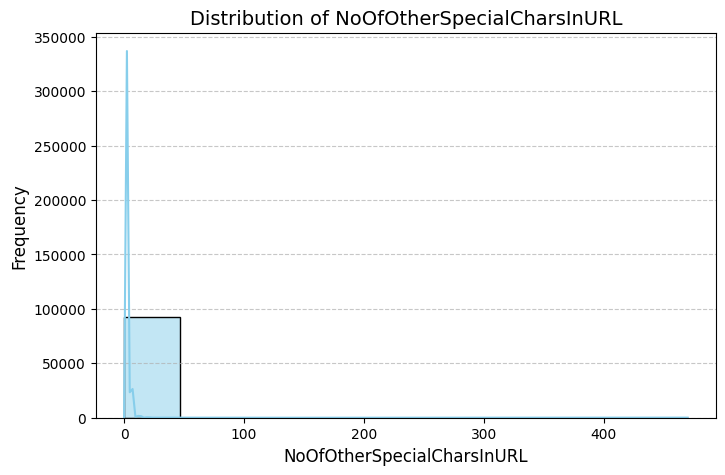

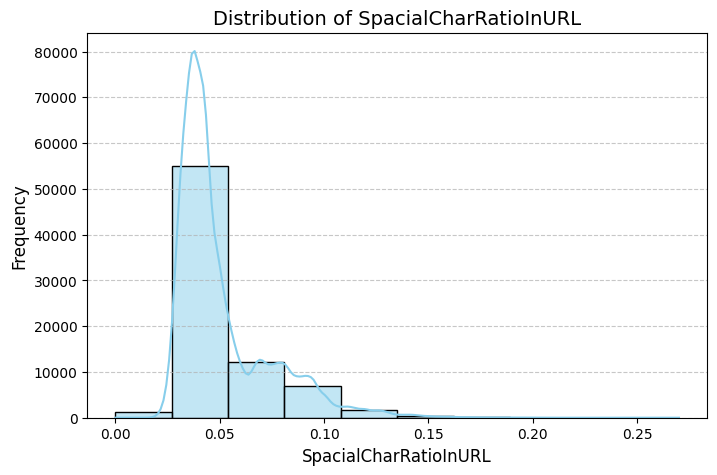

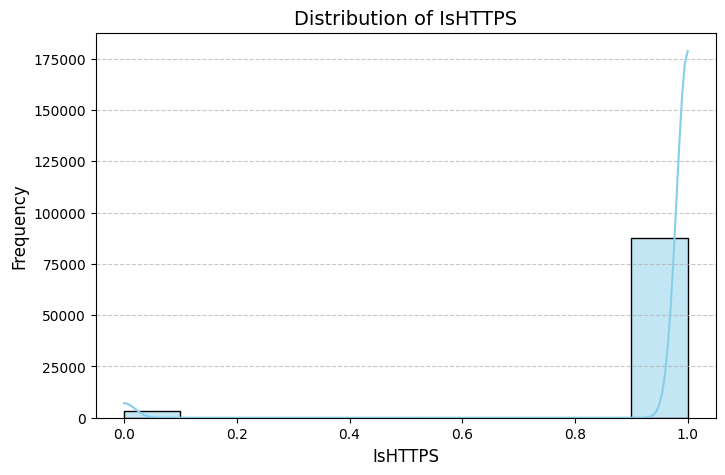

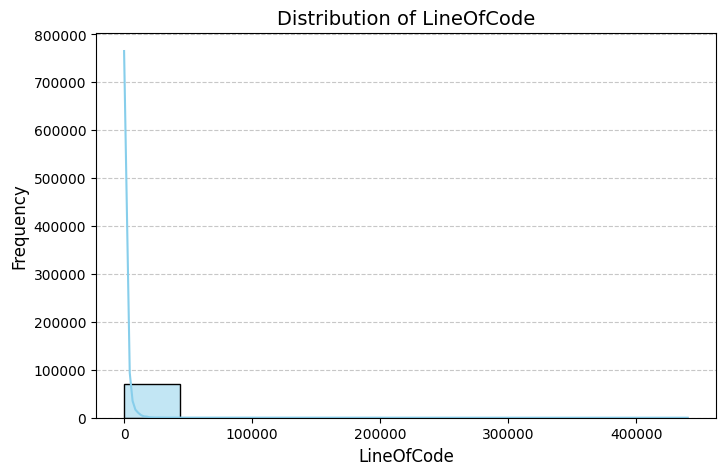

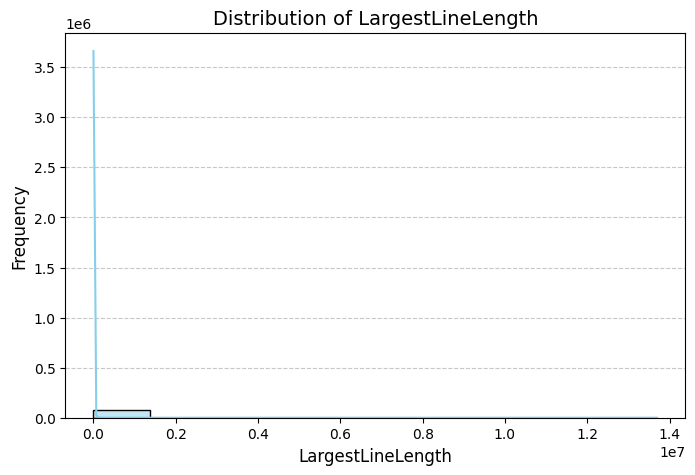

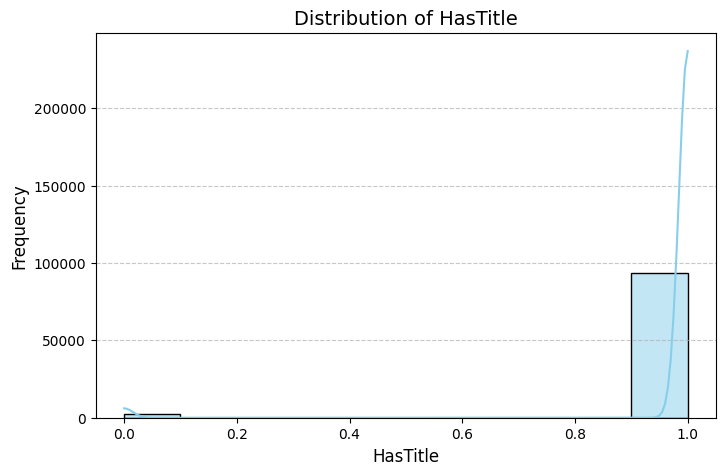

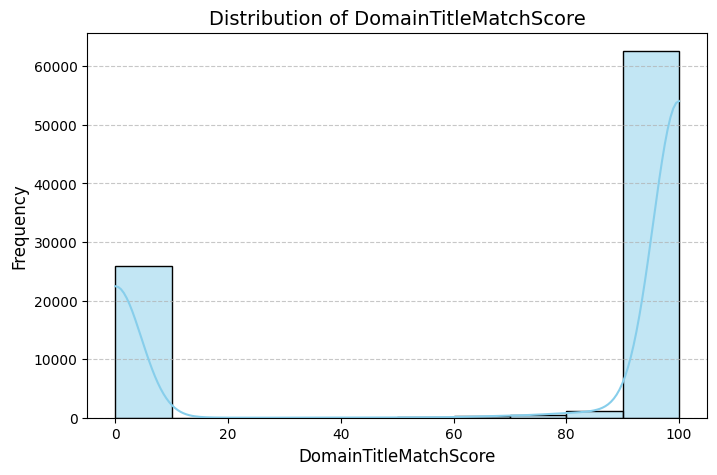

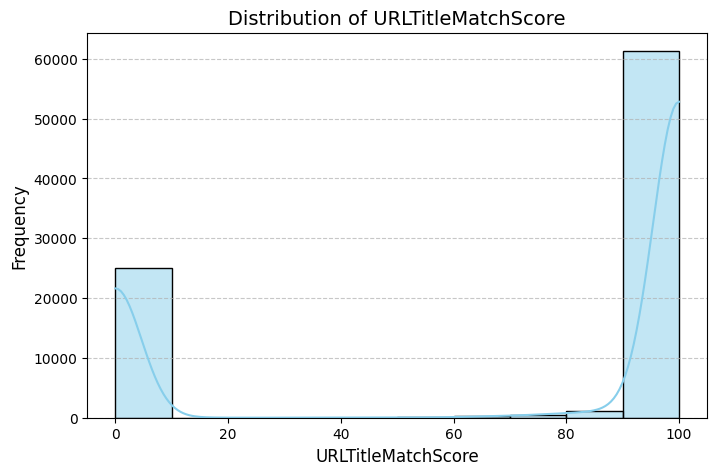

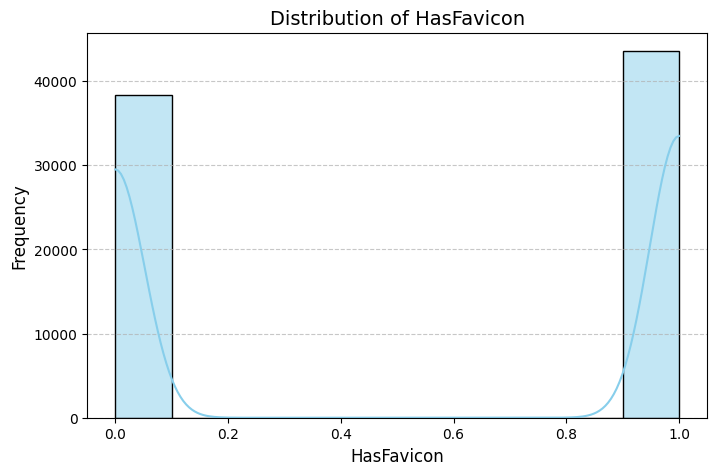

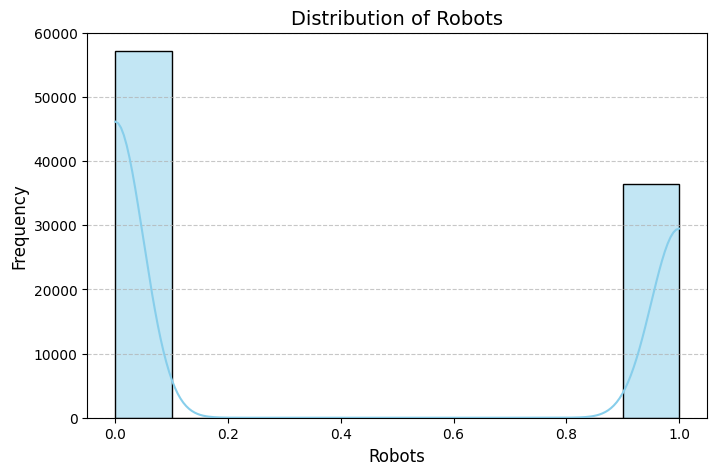

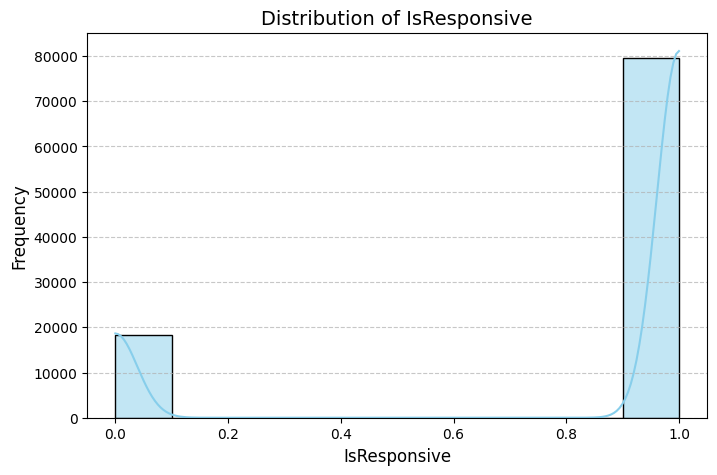

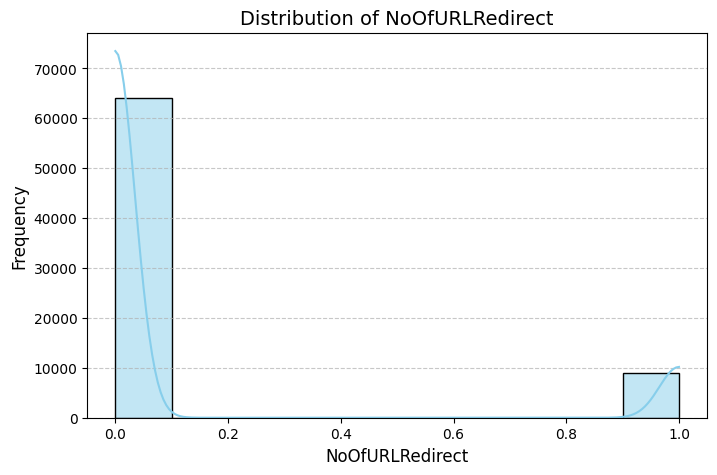

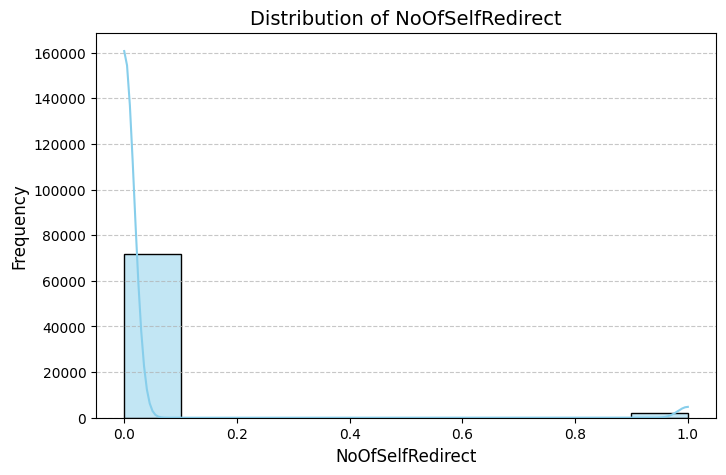

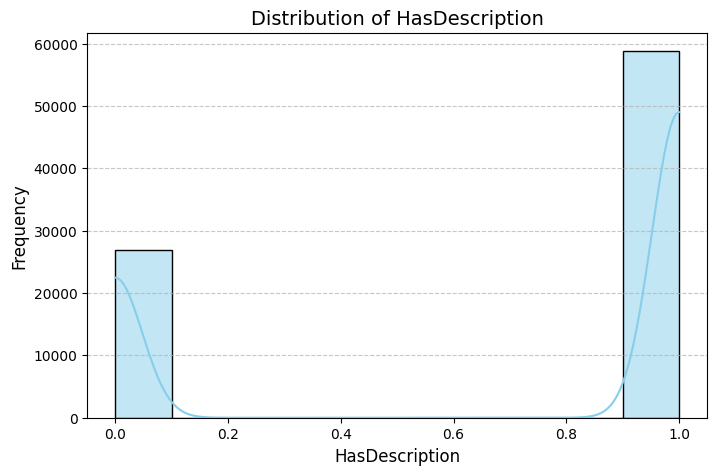

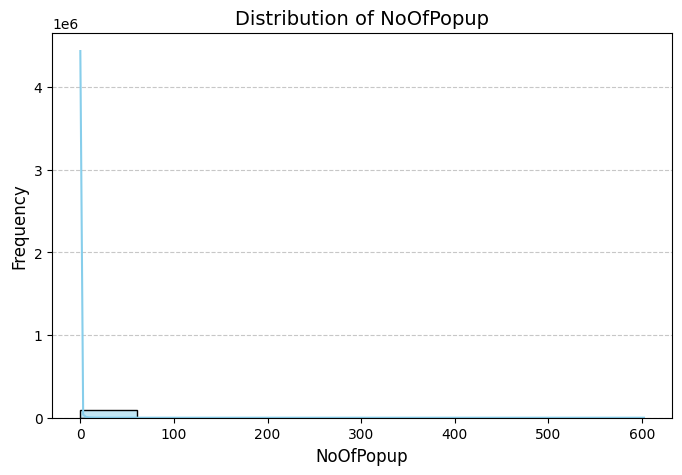

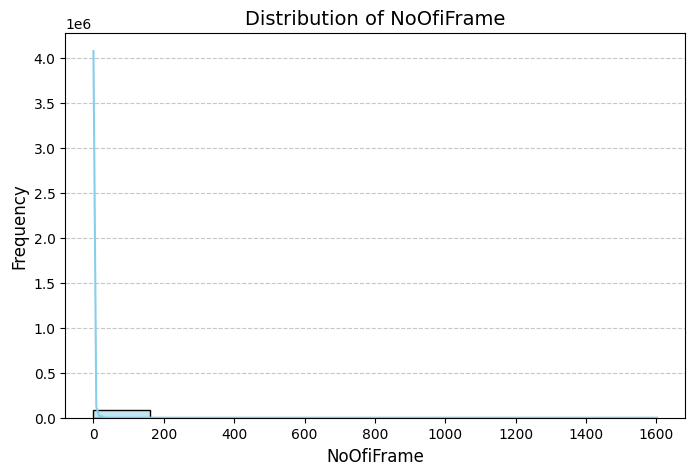

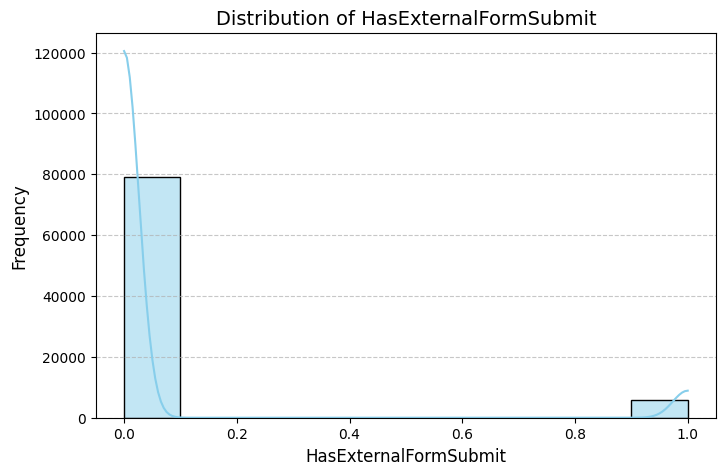

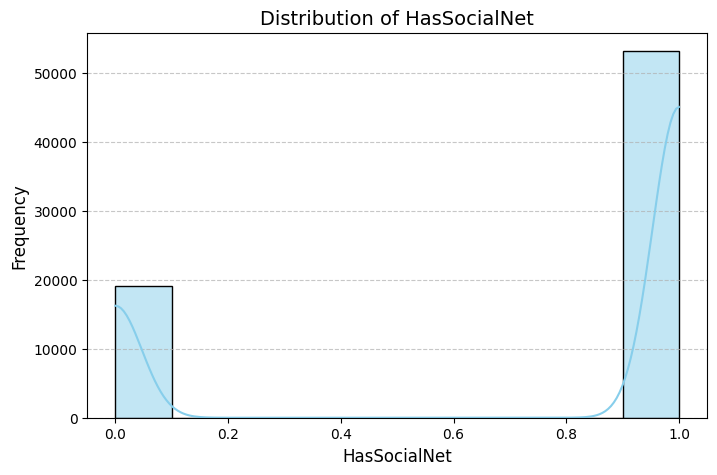

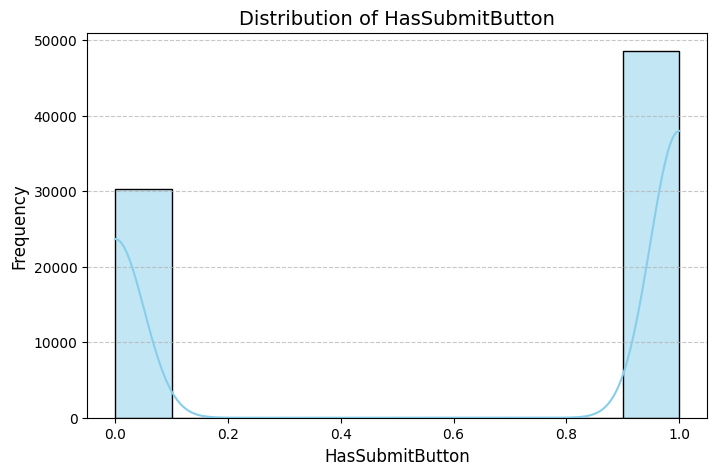

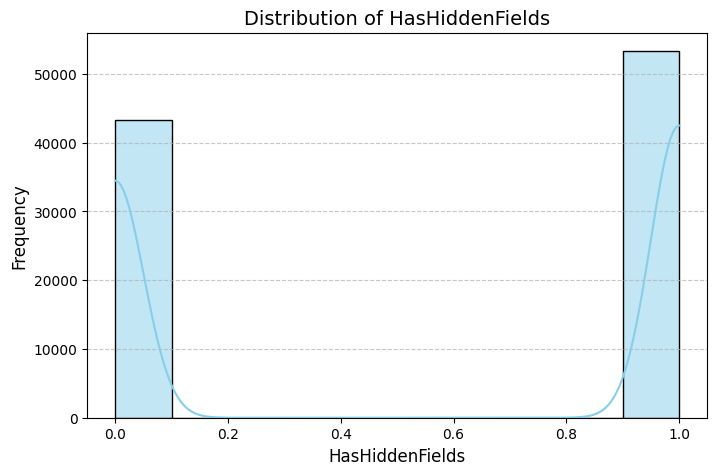

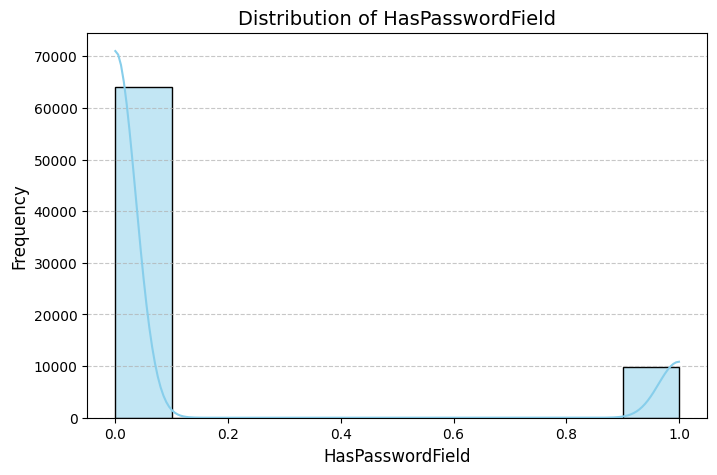

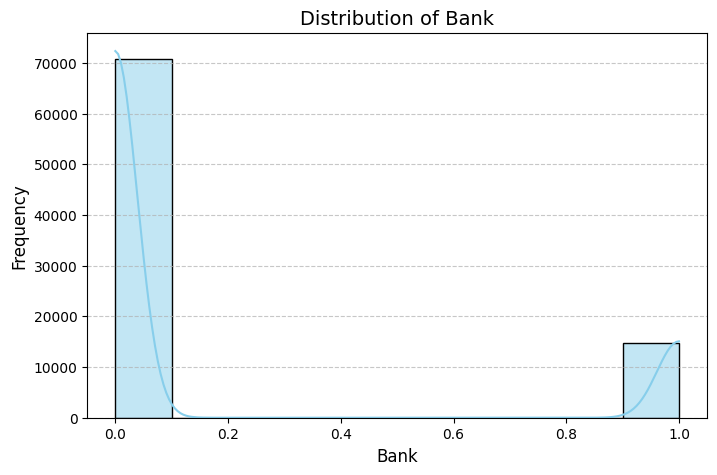

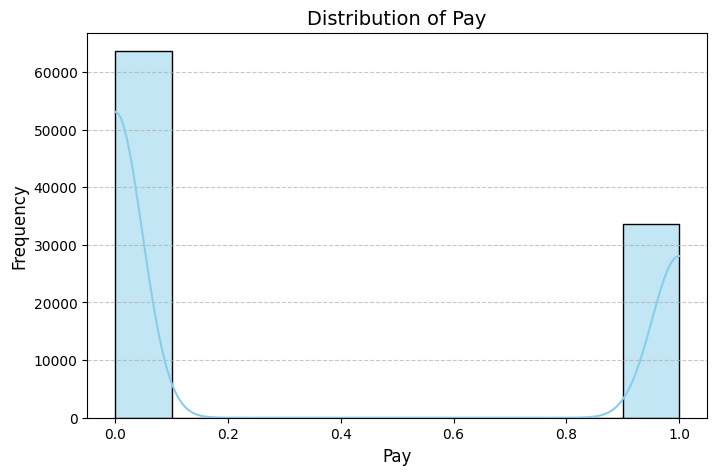

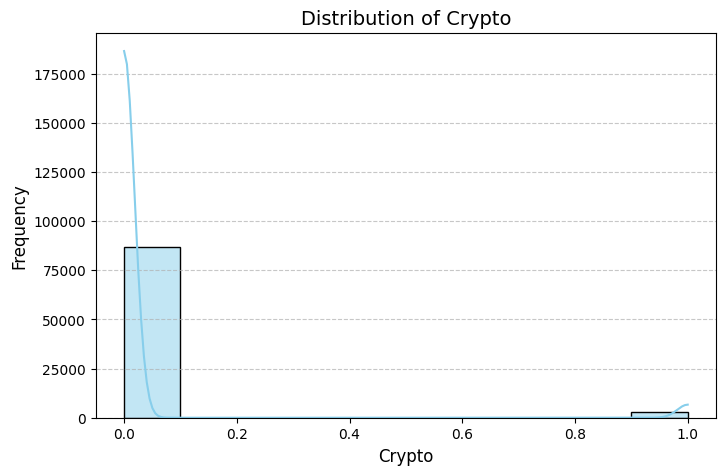

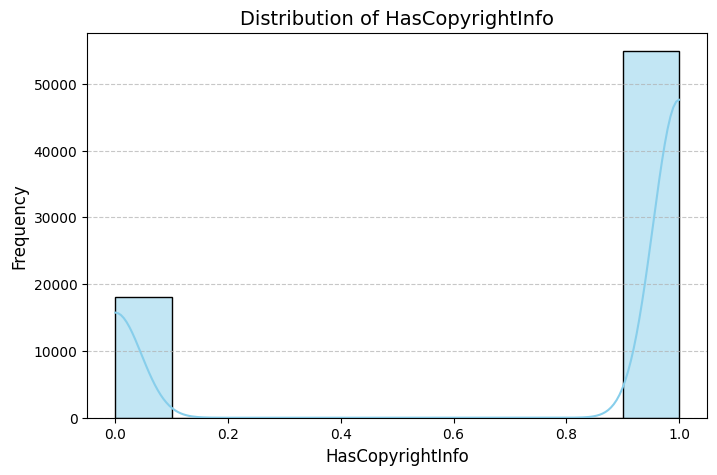

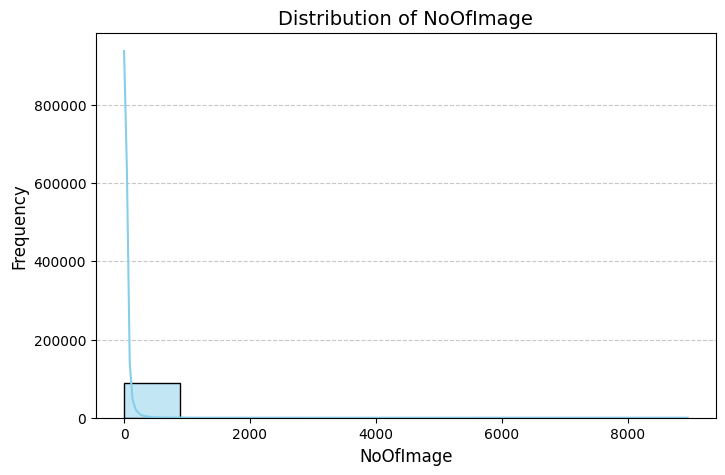

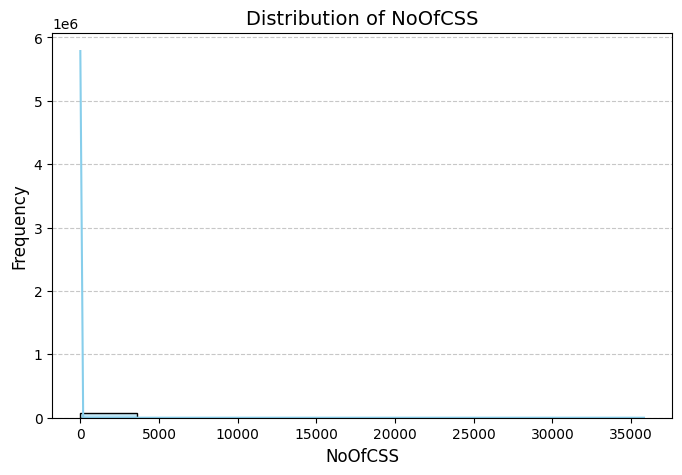

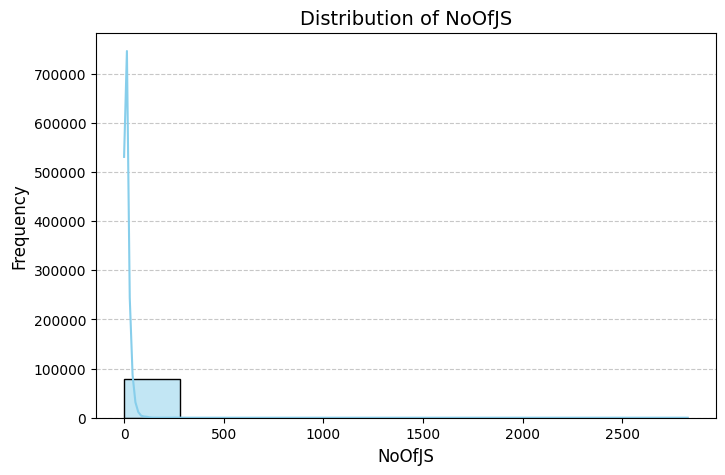

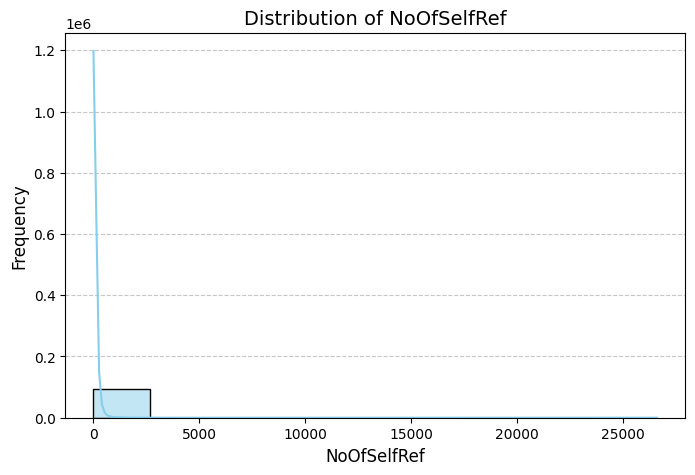

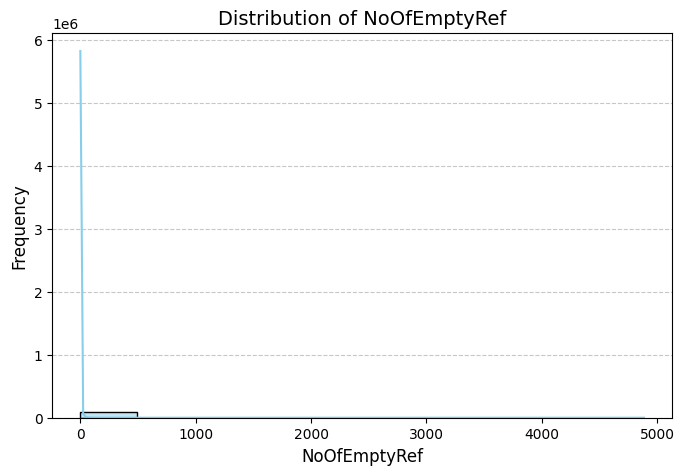

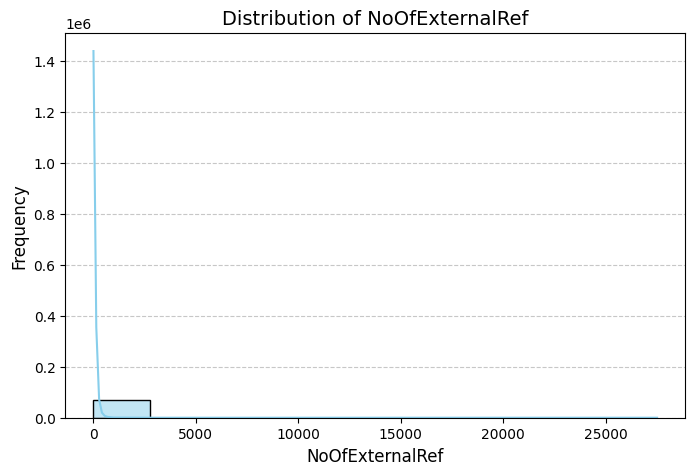

In [ ]:
# Plot distribusi fitur bertipe numerik ('float64') tanpa 'label'
for feature in distributed_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=10, color='skyblue')
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
# Plot distribusi fitur bertipe 'object'
object_features = df.select_dtypes(include=['object', 'category'])
for col in object_features:
    columns: print(df[col].value_counts())

# Runtime visualisasi distribusi fitur dengan type 'object' ini memakan waktu sangat lama (Sekitar 1 jam). Jika ingin melihat, silahkan uncomment dan run saja kak.
# # Plot distribusi fitur kategorikal
# for feature in object_features:
#     plt.figure(figsize=(8, 5))
#     sns.countplot(x=df[feature], palette='viridis', order=df[feature].value_counts().index)
#     plt.title(f"Distribution of {feature}", fontsize=14)
#     plt.xlabel(feature, fontsize=12)
#     plt.ylabel("Count", fontsize=12)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

FILENAME
8135291.txt    1
555179.txt     1
84221.txt      1
567582.txt     1
6570.txt       1
              ..
490172.txt     1
20045.txt      1
16513.txt      1
118153.txt     1
464776.txt     1
Name: count, Length: 82872, dtype: int64
URL
http://www.strangled.net                                 2
https://bmsgadmin.com/admin/index.php                    2
http://test-mantenimiento-bancaweb.azurewebsites.net/    2
https://www.abitibiexpress.ca                            1
https://ing.direct-esp.com                               1
                                                        ..
http://www.mirfinance.org                                1
https://www.eyesopen.com                                 1
https://www.wineswithattitude.co.uk                      1
https://www.incose.org                                   1
https://www.risenenergy.com                              1
Name: count, Length: 96914, dtype: int64
Domain
ipfs.io                         66
docs.google.com            

#### 3. Visualize the correlation between features and the target variable.

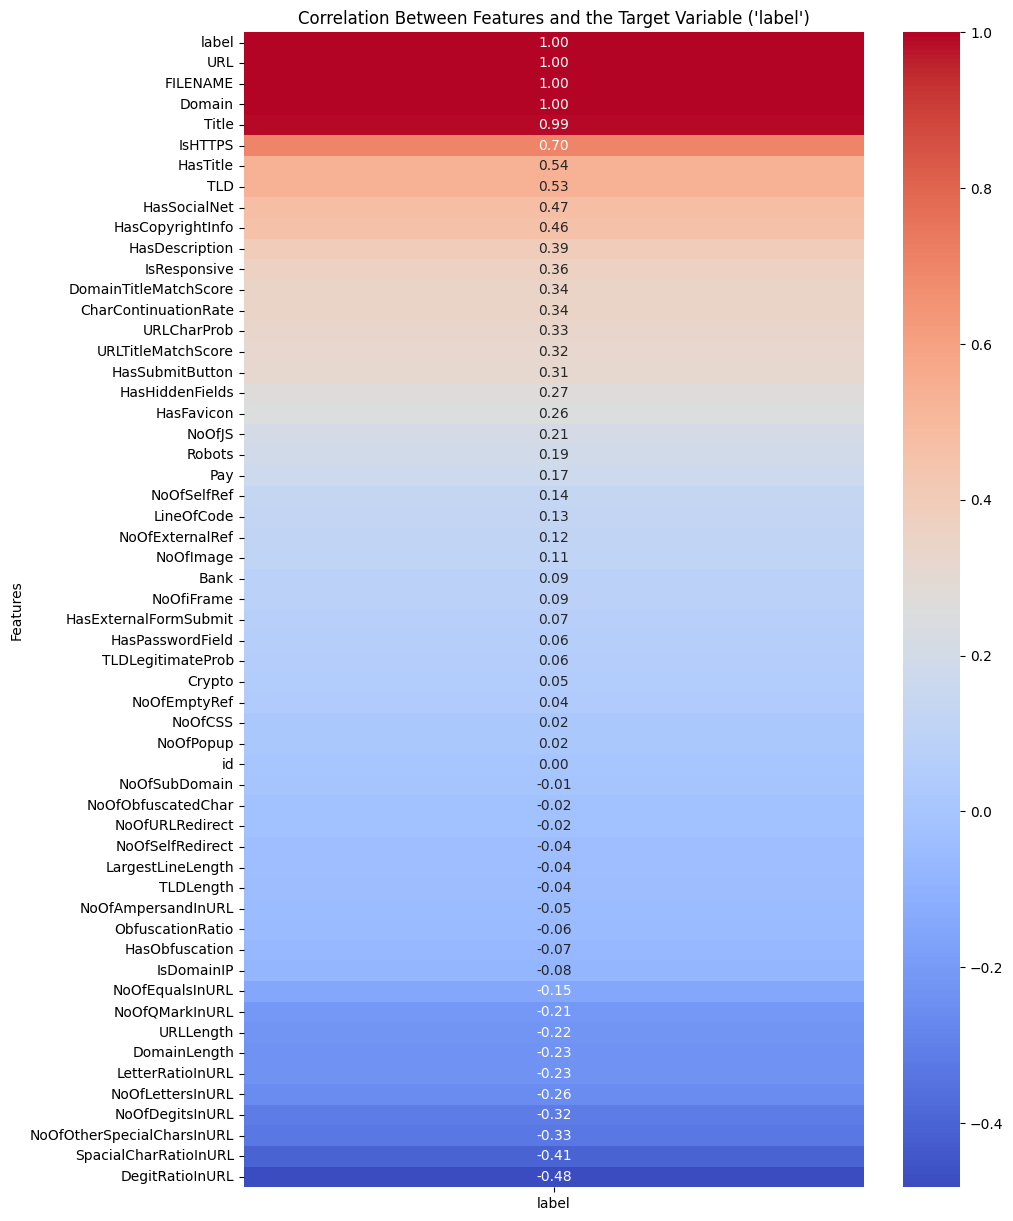

In [ ]:
object_features = df.select_dtypes(include=['object']).columns
cramers_v_values = {}

for feature in object_features:
    contingency_table = pd.crosstab(df[feature], df['label'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    cramers_v_values[feature] = cramers_v

cramers_v_df = pd.DataFrame.from_dict(cramers_v_values, orient='index', columns=['label'])

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
label_correlation = df[numerical_features].corr()
numerical_corr_df = label_correlation[['label']].rename(columns={'label': 'label'})

combined_corr_df = pd.concat([cramers_v_df, numerical_corr_df])
combined_corr_df = combined_corr_df.sort_values(by='label', ascending=False)

# Plot
plt.figure(figsize=(10, 15))
sns.heatmap(combined_corr_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 10})
plt.title("Correlation Between Features and the Target Variable ('label')")
plt.ylabel("Features")
plt.show()

#### 4.  Explain the significance of understanding feature distributions and correlations.

1. Feature Distributions

Analyzing the distribution of each feature helps identify the nature of the data (e.g., skewed, normal, uniform). This can guide preprocessing steps like normalization, scaling, or log transformations to make the data more suitable for analysis or modeling.
It also helps detect outliers or unusual patterns that could affect the model's performance, and understand the spread and central tendency of data points.

2. Feature Correlations

Understanding correlations between features helps identify relationships (linear or non-linear) between variables, which can be useful in feature selection, model interpretation, or creating new features.

## B. Data Insights

The objective of this section is for participants to understand how to formulate and get many insights from the given data so that we can improve the model performance. Given example questions:

1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?
2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?
3. How does website-resource-related features vary across phishing and non-phishing URLs?

### Step 1

Answer the three example questions by visualizing and explaining the insights for each question. Add markdown texts to explain the visualizations.

#### 1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?

<ipython-input-15-eae754742c89>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df["URL"].fillna("", inplace=True)


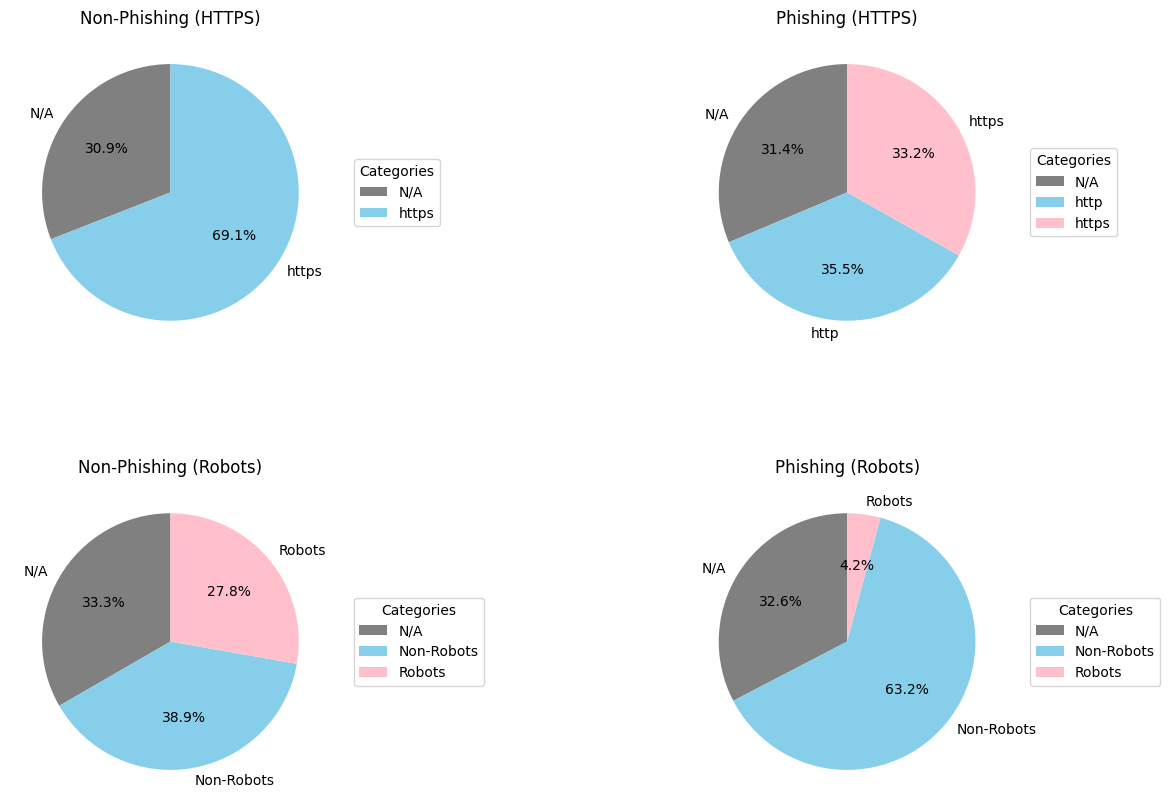

In [ ]:
# Using Pie Chart as the best practice methode to visualized proportion.

filtered_df = df.copy()

filtered_df["IsHTTPS"] = "N/A"
filtered_df["URL"].fillna("", inplace=True)
for idx, row in filtered_df.iterrows():
    if row["URL"].startswith("https://"):
        filtered_df.at[idx, "IsHTTPS"] = "https"
    elif row["URL"].startswith("http://"):
        filtered_df.at[idx, "IsHTTPS"] = "http"

filtered_df["Robots"] = filtered_df["Robots"].map({1: "Robots", 0: "Non-Robots"}).fillna("N/A")

label_colors = ['grey', 'skyblue', 'pink']

https_counts = {
    "Non-Phishing (HTTPS)": filtered_df[filtered_df["label"] == 1]["IsHTTPS"].value_counts().sort_index(),
    "Phishing (HTTPS)": filtered_df[filtered_df["label"] == 0]["IsHTTPS"].value_counts().sort_index(),
}

robots_counts = {
    "Non-Phishing (Robots)": filtered_df[filtered_df["label"] == 1]["Robots"].value_counts().sort_index(),
    "Phishing (Robots)": filtered_df[filtered_df["label"] == 0]["Robots"].value_counts().sort_index(),
}

pie_data = list(https_counts.values()) + list(robots_counts.values())
titles = list(https_counts.keys()) + list(robots_counts.keys())

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for idx, ax in enumerate(axes.flat):
    ax.pie(pie_data[idx], labels=pie_data[idx].index, autopct='%1.1f%%', startangle=90, colors=label_colors)
    ax.set_title(titles[idx])
    ax.legend(pie_data[idx].index, title="Categories", loc="center left", bbox_to_anchor=(1.05, 0.5))

plt.subplots_adjust(right=0.85, hspace=0.4, wspace=0.4)
plt.show()

From the visualized proportions, we can see that in the non-phishing category, URLs with `IsHTTPS` (secure connections) are more prevalent, indicating that legitimate websites typically use secure protocols. In contrast, phishing URLs tend to be more associated with `http://` (non-secure connections), further supporting the idea that phishing sites often lack HTTPS encryption. Regarding the `Robots` feature, the non-phishing sites are more likely to have `Robots` enabled, suggesting that legitimate websites allow search engine bots to index their content. On the other hand, phishing sites typically do not enable `Robots` or may have it set to non-robots, which is a common tactic to avoid detection by search engines. This combination of security features (`IsHTTPS` and `Robots`) can help identify and differentiate phishing from legitimate websites.

#### 2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?

URL Characteristics:
- `URLLength`
- `Domain`
- `DomainLength`
- `IsDomainIP`
- `TLD`
- `TLDLength`
- `NoOfSubDomain`
- `HasObfuscation`
- `NoOfObfuscatedChar`
- `ObfuscationRatio`
- `NoOfLettersInURL`
- `LetterRatioInURL`
- `NoOfDegitsInURL`
- `DegitRatioInURL`
- `NoOfEqualsInURL`
- `NoOfQMarkInURL`
- `NoOfAmpersandInURL`
- `NoOfOtherSpecialCharsInURL`
- `SpacialCharRatioInURL`
- `CharContinuationRate`

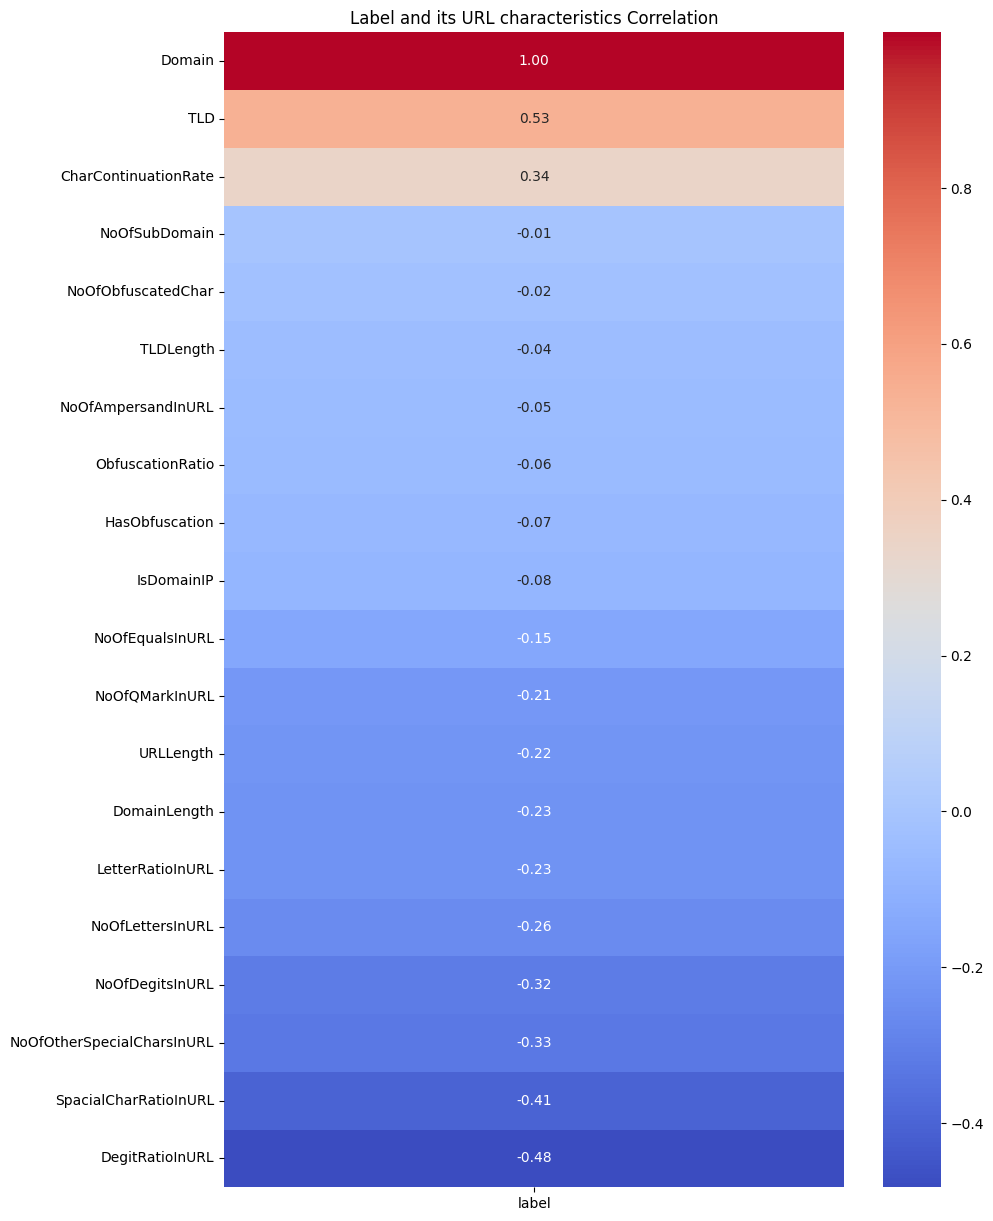

In [ ]:
url_characteristics = [
    'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'TLDLength', 'NoOfSubDomain',
    'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
    'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'CharContinuationRate'
]

numeric_columns = df[url_characteristics].select_dtypes(include=['number']).columns
object_columns = df[url_characteristics].select_dtypes(include=['object']).columns
label = df['label']

numeric_correlation_df = df[numeric_columns].corrwith(label).sort_values(ascending=False)
numeric_correlation_df = numeric_correlation_df.to_frame(name='label')

cramers_v_values = {}
for feature in object_columns:
    contingency_table = pd.crosstab(df[feature], df['label'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    cramers_v_values[feature] = cramers_v
cramers_v_df = pd.DataFrame.from_dict(cramers_v_values, orient='index', columns=['label'])

combined_corr_df = pd.concat([numeric_correlation_df, cramers_v_df], axis=0)
combined_corr_df = combined_corr_df.sort_values(by='label', ascending=False)

plt.figure(figsize=(10, 15))
sns.heatmap(combined_corr_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 10}, xticklabels=['label'])
plt.title("Label and its URL characteristics Correlation")
plt.show()

From the correlation analysis, it appears that most URL characteristics do not exhibit strong correlations with the label (phishing vs non-phishing). The correlation values are quite low, with most features showing correlations near or below 0, suggesting that these URL characteristics may not directly influence the likelihood of a URL being phishing or non-phishing.

However, from the heatmap visualization, there are a few features that show slightly stronger relationships with the label, namely `CharContinuationRate`, `TLD`, and `Domain`. These features might offer useful signals for distinguishing between phishing and non-phishing URLs, even if the correlation values are not very high. This insight suggests that while these characteristics alone might not provide a clear-cut answer, they could still be valuable when combined with other features or used in advanced modeling techniques like machine learning models.

It's also important to take note that the `Domain` feature has high cardinality, which could introduce bias in the model. High cardinality categorical features, like `Domain`, can overwhelm the model, as they introduce many unique values. This might skew the results, so it would be advisable to carefully handle this feature during model preprocessing (e.g., through encoding techniques or grouping similar values).

#### 3. How does website-resource-related features vary across phishing and non-phishing URLs?

Website resource related features:
- `NoOfImage`
- `NoOfCSS`
- `NoOfJS`
- `NoOfSelfRef`
- `NoOfEmptyRef`
- `NoOfExternalRef`

+-----------------+--------------+-----------------+--------------+-----------------+---------------------+--------------------+-----------------+--------------------+--------------------+--------------------+
|                 | Phishing_Min | NonPhishing_Min | Phishing_Max | NonPhishing_Max |    Phishing_Mean    |  NonPhishing_Mean  | Phishing_Median | NonPhishing_Median |    Phishing_Std    |  NonPhishing_Std   |
+-----------------+--------------+-----------------+--------------+-----------------+---------------------+--------------------+-----------------+--------------------+--------------------+--------------------+
|    NoOfImage    |     0.0      |       0.0       |    158.0     |     8956.0      | 0.8872368614750479  | 44.97786838908334  |       0.0       |        25.0        | 3.7924593413375947 | 105.94931918913252 |
|     NoOfCSS     |     0.0      |       0.0       |     15.0     |     35820.0     | 0.3932296431838975  | 11.064567509770665 |       0.0       |        6.0   

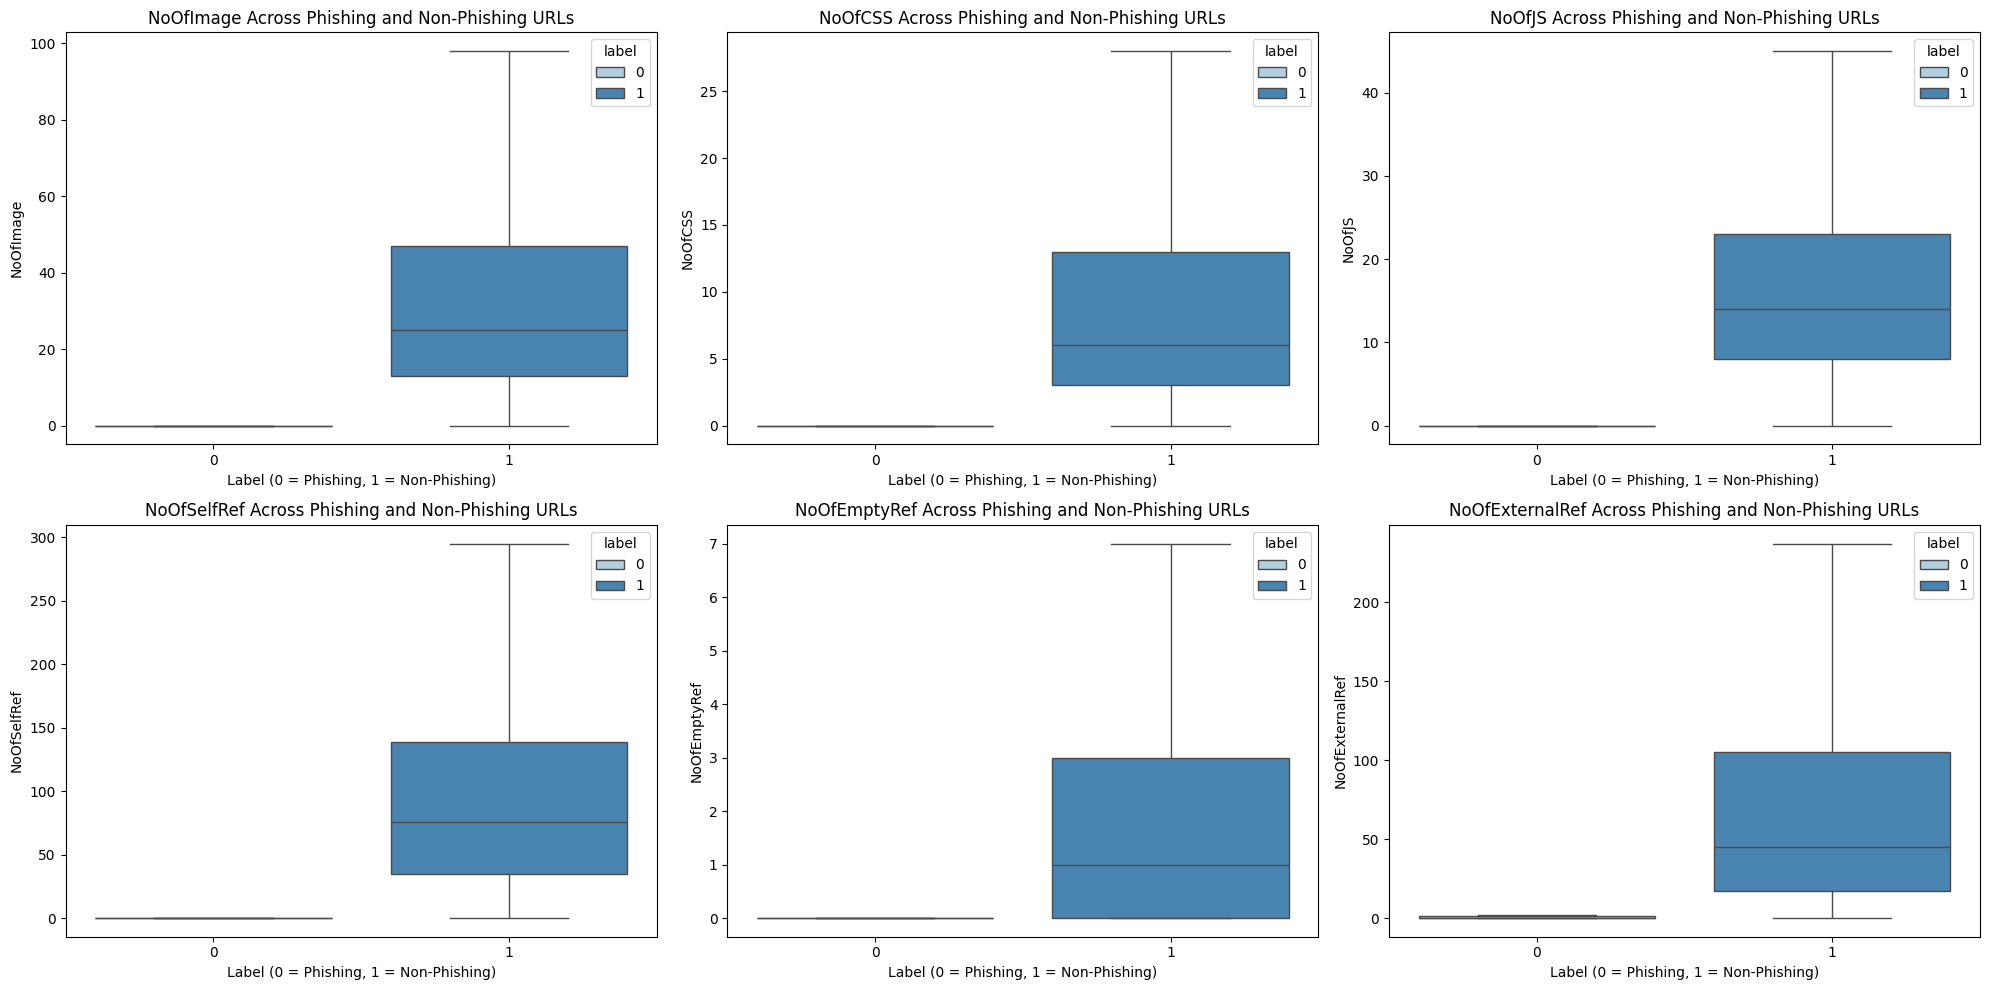

In [ ]:
phishing = df[df['label'] == 0]
non_phishing = df[df['label'] == 1]
resource_features = ['NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']

summary_stats = pd.DataFrame()
summary_stats['Phishing_Min'] = phishing[resource_features].min().T
summary_stats['NonPhishing_Min'] = non_phishing[resource_features].min().T
summary_stats['Phishing_Max'] = phishing[resource_features].max().T
summary_stats['NonPhishing_Max'] = non_phishing[resource_features].max().T
summary_stats['Phishing_Mean'] = phishing[resource_features].mean().T
summary_stats['NonPhishing_Mean'] = non_phishing[resource_features].mean().T
summary_stats['Phishing_Median'] = phishing[resource_features].median().T
summary_stats['NonPhishing_Median'] = non_phishing[resource_features].median().T
summary_stats['Phishing_Std'] = phishing[resource_features].std().T
summary_stats['NonPhishing_Std'] = non_phishing[resource_features].std().T
print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))

plt.figure(figsize=(20, 10))
for i, feature in enumerate(resource_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='label', y=feature, hue='label', palette='Blues', showfliers=False)
    plt.title(f'{feature} Across Phishing and Non-Phishing URLs')
    plt.xlabel('Label (0 = Phishing, 1 = Non-Phishing)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Phishing URLs tend to have fewer website resources (like images, CSS, JavaScript, and external references) compared to non-phishing URLs. This suggests that phishing websites often use simpler designs with fewer resources to avoid detection or appear less suspicious. In contrast, non-phishing URLs, which are more likely to be legitimate, typically have more resources. This difference in resources could help identify phishing websites and be used in further analysis or machine learning models to distinguish between phishing and non-phishing URLs.

### Step 2

Try to formulate three other new questions and answer them with the methods used before.

#### 4. What is the most `TLD` that phished and how was the proportion between phishing and non-phishing? (Top 10)


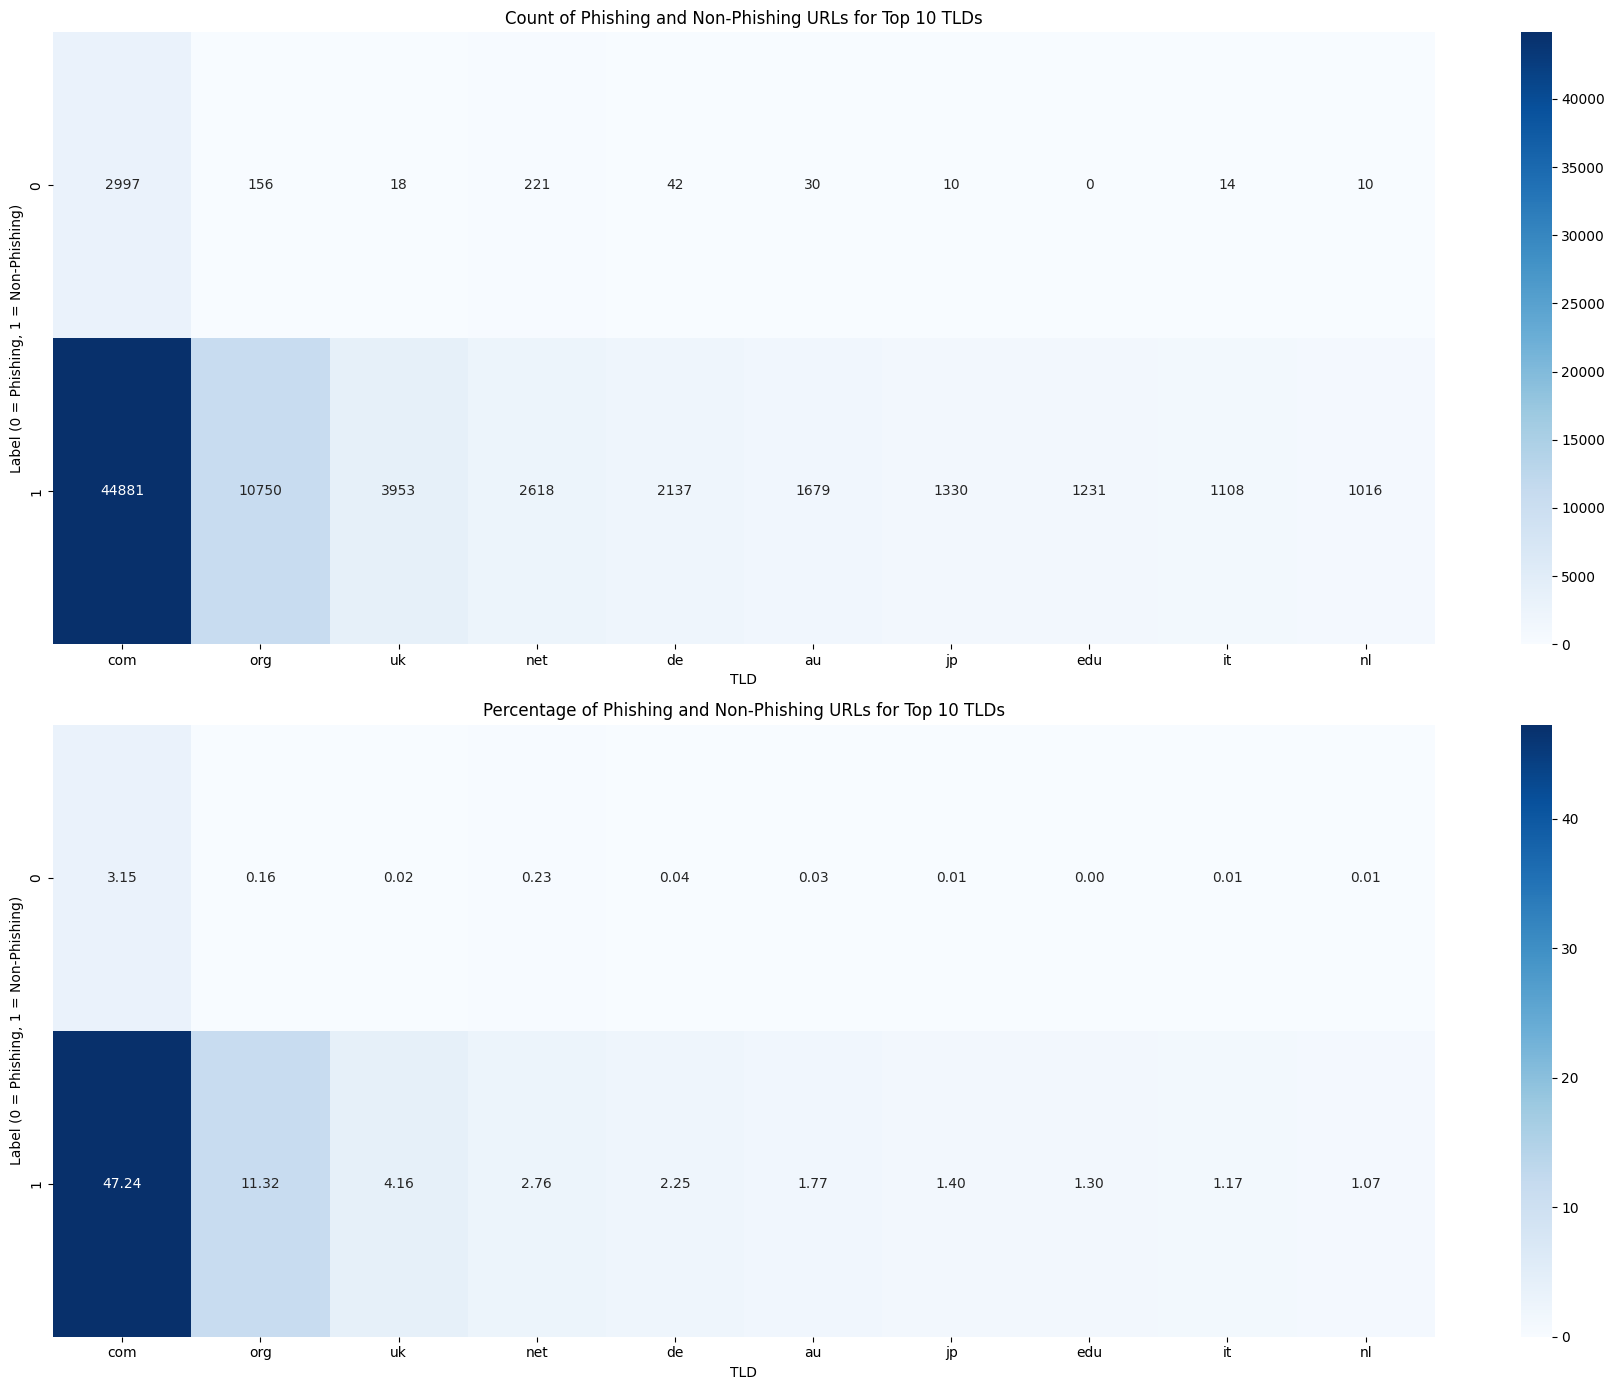

In [ ]:
matrix_tld = df.groupby(['label', 'TLD']).size().unstack(fill_value=0)
total_tld = matrix_tld.sum().sum()
matrix_tld_percentage = matrix_tld.div(total_tld) * 100

top_10_tlds = matrix_tld.loc[1].sort_values(ascending=False).head(10).index
matrix_tld_top_10 = matrix_tld[top_10_tlds]
matrix_tld_percentage_top_10 = matrix_tld_percentage[top_10_tlds]

fig, axes = plt.subplots(2, 1, figsize=(18, 14))

sns.heatmap(matrix_tld_top_10, annot=True, cmap='Blues', fmt='g', cbar=True, ax=axes[0])
axes[0].set_title('Count of Phishing and Non-Phishing URLs for Top 10 TLDs')
axes[0].set_xlabel('TLD')
axes[0].set_ylabel('Label (0 = Phishing, 1 = Non-Phishing)')

sns.heatmap(matrix_tld_percentage_top_10, annot=True, cmap='Blues', fmt='.2f', cbar=True, ax=axes[1])
axes[1].set_title('Percentage of Phishing and Non-Phishing URLs for Top 10 TLDs')
axes[1].set_xlabel('TLD')
axes[1].set_ylabel('Label (0 = Phishing, 1 = Non-Phishing)')

plt.tight_layout()
plt.show()

From the analysis, it is observed that most websites across various TLDs are categorized as phishing, indicating that phishing websites are widespread across different domain extensions. Although TLD shows a significant correlation with the label (phishing or non-phishing), it is not a reliable parameter on its own for detecting phishing websites, as phishing websites are present in multiple TLDs. However, an interesting observation is that all URLs with the `.edu` TLD are phishing, which might imply that education-related websites have a higher likelihood of being used for phishing.

#### 5. How does the URLLength (length of the URL) differ significantly across phishing and non-phishing URLs??

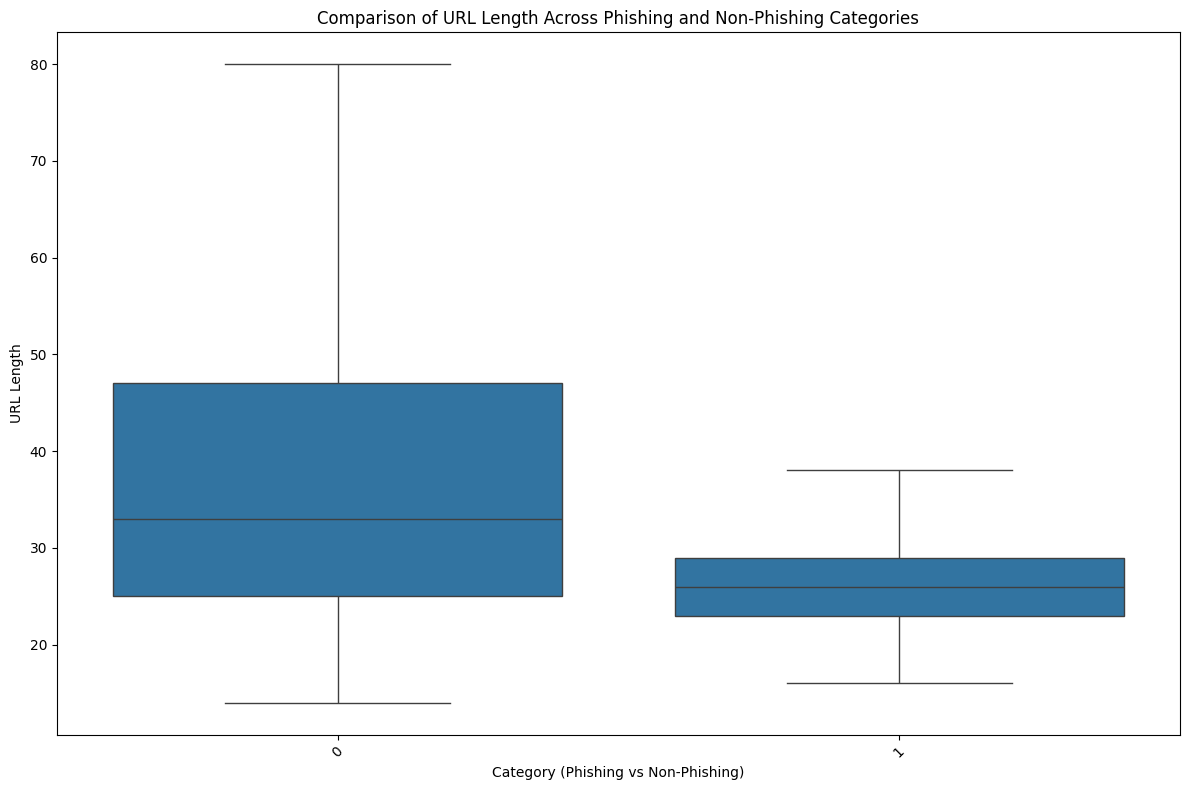

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=df, x='label', y='URLLength', showfliers=False)

plt.title('Comparison of URL Length Across Phishing and Non-Phishing Categories')
plt.xlabel('Category (Phishing vs Non-Phishing)')
plt.ylabel('URL Length')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The URLLength feature shows that phishing URLs tend to be longer than non-phishing URLs. Phishing sites often use longer URLs with extra characters or subdomains to hide their true destination. In contrast, non-phishing URLs are usually shorter and simpler. This difference in length helps us identify whether a URL is more likely to be phishing or non-phishing.

#### 6. Do the features `URLCharProb` (URL Character Probability) and `CharContinuationRate` differ significantly between phishing and non-phishing URLs?

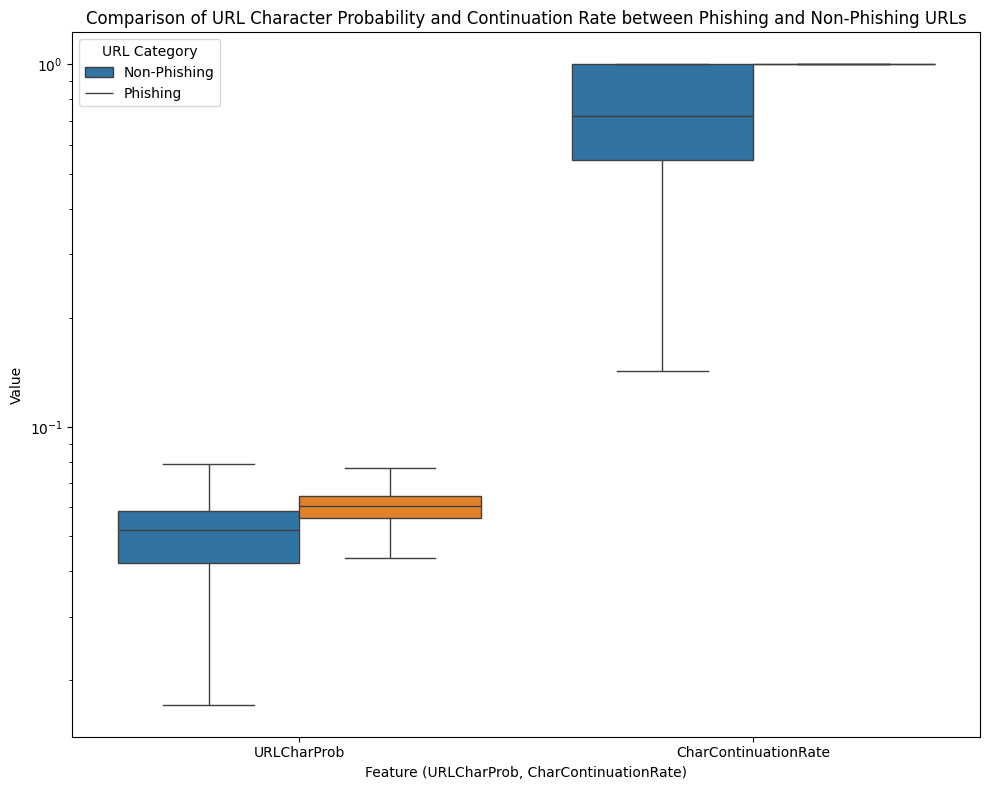

In [ ]:
charprob_data = df.melt(id_vars=['label'], value_vars=['URLCharProb', 'CharContinuationRate'],
                        var_name='Feature', value_name='Value')

plt.figure(figsize=(10, 8))
sns.boxplot(data=charprob_data, x='Feature', y='Value', hue='label', showfliers=False)

plt.yscale('log')
plt.title('Comparison of URL Character Probability and Continuation Rate between Phishing and Non-Phishing URLs')
plt.xlabel('Feature (URLCharProb, CharContinuationRate)')
plt.ylabel('Value')
plt.legend(title='URL Category', labels=['Non-Phishing', 'Phishing'])
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned = df.dropna(subset=['URLCharProb', 'CharContinuationRate', 'label'])
urlcharprob_phishing = df_cleaned[df_cleaned['label'] == 0]['URLCharProb']
urlcharprob_non_phishing = df_cleaned[df_cleaned['label'] == 1]['URLCharProb']

charcontinuationrate_phishing = df_cleaned[df_cleaned['label'] == 0]['CharContinuationRate']
charcontinuationrate_non_phishing = df_cleaned[df_cleaned['label'] == 1]['CharContinuationRate']

print("URLCharProb Difference")
u_stat_urlcharprob, p_value_urlcharprob = mannwhitneyu(urlcharprob_phishing, urlcharprob_non_phishing)
print("U-Statistic:", u_stat_urlcharprob)
print(f"P-Value: {p_value_urlcharprob:.4f}")

print("\nCharContinuationRate Difference")
u_stat_charcontinuationrate, p_value_charcontinuationrate = mannwhitneyu(charcontinuationrate_phishing, charcontinuationrate_non_phishing)
print("U-Statistic:", u_stat_charcontinuationrate)
print(f"P-Value: {p_value_charcontinuationrate:.4f}")

URLCharProb Difference
U-Statistic: 53963299.0
P-Value: 0.0000

CharContinuationRate Difference
U-Statistic: 58495915.0
P-Value: 0.0000


The p-value of 0.0000 in the test is influenced by the way missing values were handled in the dataset. When missing values are dropped, the remaining data may become more homogeneous, especially if the missingness is not random. In cases where a significant portion of the data is missing from one category (e.g., phishing or non-phishing URLs), removing those rows can lead to an imbalance between the groups, making the remaining data more distinct. This results in a larger observed difference between the two groups, which in turn leads to a smaller p-value. Essentially, the missing data, when removed, can artificially strengthen the observed difference by reducing noise, thus increasing the likelihood of finding a statistically significant result, which is why the p-value is very close to zero.